In [ ]:
# import the required libraries

import io
import random
import warnings

import pandas             as pd
import numpy              as np
import seaborn            as sns
import matplotlib.pyplot  as plt

from math         import sqrt
from pylab        import rcParams
from numpy        import std, mean, median, percentile
from matplotlib   import pyplot
from sklearn      import preprocessing, feature_selection
from pandas       import read_csv

from google.colab                 import files
from sklearn.model_selection      import train_test_split, RepeatedStratifiedKFold, cross_val_score, GridSearchCV
from sklearn.linear_model         import LogisticRegression, SGDClassifier
from sklearn.datasets             import make_classification
from sklearn.preprocessing        import LabelEncoder, StandardScaler, MinMaxScaler, KBinsDiscretizer
from sklearn.metrics              import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, accuracy_score, f1_score, log_loss, recall_score
from sklearn.feature_selection    import f_classif
from sklearn.neighbors            import KNeighborsClassifier
from sklearn.pipeline             import Pipeline
from sklearn.calibration          import CalibratedClassifierCV
from sklearn.base                 import BaseEstimator, TransformerMixin
from scipy.stats                  import chi2_contingency, skew, kurtosis, entropy

#warnings.filterwarnings('ignore')
#np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)})
#pd.set_option('display.max_rows',500)
#!pip install category_encoders


In [ ]:
# loading the dataset

FileName = 'LoansList_5_3_21.xlsx'
FileData = pd.read_excel(FileName)
df=FileData.copy()

#uploaded = files.upload()
#df = pd.read_excel(io.BytesIO(uploaded['LoansList_5_3_21.xlsx']))


In [ ]:
# formatting the data

## eg: Timestamp('2020-03-20 00:00:00')
df['loanStartDate'] = df['loanStartDate'].str[4:15]
df['loanStartDate'] = pd.to_datetime(df['loanStartDate'], infer_datetime_format=True)

# unknown flag
df.replace(np.nan,'un',inplace=True) 

df = df.rename(columns = {"delequent":"delinquent"})

df['enterpisePartner'].replace('MINDSARRAY NETWORK PRIVATE LIMITED',                'MIN',inplace=True)
df['enterpisePartner'].replace('EKO INDIA FINANCIAL SERVICES PRIVATE LIMITED',      'EKO',inplace=True)
df['enterpisePartner'].replace('CHAMPION SOFTWARE TECHNOLOGIES LTD',                'CHA',inplace=True)
df['enterpisePartner'].replace('RRS FINANCIAL AND ONLINE SOLUTIONS',                'RRS',inplace=True)
df['enterpisePartner'].replace('SUGAL AND DAMANI UTILITY SERVICES PRIVATE LIMITED', 'SUG',inplace=True)
df['enterpisePartner'].replace('ENACH TEST PARTNER',                                'ENA',inplace=True)

df['state'].replace(['MAAHARASHTRA', 'Maharashtra', 'MAHARASHTRA'],               'MH',inplace=True)
df['state'].replace(['UTTAR PRADESH', 'Uttar Pradesh'],                           'UP',inplace=True)
df['state'].replace(['DELHI', 'Delhi'],                                           'DL',inplace=True)
df['state'].replace(['TELANGANA', 'Telangana', 'TELEANGANA'],                     'TG',inplace=True)
df['state'].replace(['KARNATAKA', 'Karnataka'],                                   'KA',inplace=True)
df['state'].replace(['PUNJAB', 'Punjab'],                                         'PN',inplace=True)
df['state'].replace(['ASSAM'],                                                    'AS',inplace=True)
df['state'].replace(['Haryana', 'HARYANA'],                                       'HR',inplace=True)
df['state'].replace(['RAJASTHAN', 'Rajasthan'],                                   'RJ',inplace=True)
df['state'].replace(['WEST BENGAL'],                                              'WB',inplace=True)
df['state'].replace(['SIKKIM'],                                                   'SK',inplace=True)
df['state'].replace(['NAGALAND'],                                                 'NG',inplace=True)
df['state'].replace(['Andhra Pradesh', 'ANDRA PRADESH', 'ANDHRA PRADESH'],        'AP',inplace=True)
df['state'].replace(['JHARKHAND'],                                                'JH',inplace=True)
df['state'].replace(['MEGHALAYA'],                                                'ML',inplace=True)
df['state'].replace(['Kerala'],                                                   'KL',inplace=True)
df['state'].replace(['Daman and Diu', 'DAMAN AND DIU'],                           'DH',inplace=True)
df['state'].replace(['Bihar', 'BIHAR'],                                           'BR',inplace=True)
df['state'].replace(['Tamil Nadu', 'TAMIL NADU'],                                 'TN',inplace=True)
df['state'].replace(['HIMACHAL PRADESH', 'HIMACHAL PRADESH', 'Himachal Pradesh'], 'HP',inplace=True)
df['state'].replace(['Gujarat', 'GUJARAT'],                                       'GJ',inplace=True)
df['state'].replace(['ARUNACHAL PRADESH'],                                        'AR',inplace=True)
df['state'].replace(['MADHYA PRADESH'],                                           'MP',inplace=True)

df['maritalStatus'].replace(['M'],  'Married',inplace=True)

df['gender'].replace(['M'], 'Male',inplace=True)


* **feature engineering**

In [ ]:
df_count  = df.copy()
df_vol    = df.copy()

cols_count  = ['tranCount_2021_feb', 'tranCount_2021_jan', 'tranCount_2020_dec', 'tranCount_2020_nov', 'tranCount_2020_oct', 'tranCount_2020_sep', 'tranCount_2020_aug', 
               'tranCount_2020_jul', 'tranCount_2020_jun', 'tranCount_2020_may', 'tranCount_2020_apr', 'tranCount_2020_mar', 'tranCount_2020_feb', 'tranCount_2020_jan', 
               'tranCount_2019_dec', 'tranCount_2019_nov', 'tranCount_2019_oct', 'tranCount_2019_sep', 'tranCount_2019_aug', 'tranCount_2019_jul', 'tranCount_2019_jun', 
               'tranCount_2019_may', 'tranCount_2019_apr', 'tranCount_2019_mar', 'tranCount_2019_feb', 'tranCount_2019_jan']
cols_vol    = ['tranVol_2021_feb', 'tranVol_2021_jan', 'tranVol_2020_dec', 'tranVol_2020_nov', 'tranVol_2020_oct', 'tranVol_2020_sep', 'tranVol_2020_aug', 
               'tranVol_2020_jul', 'tranVol_2020_jun', 'tranVol_2020_may', 'tranVol_2020_apr', 'tranVol_2020_mar', 'tranVol_2020_feb', 'tranVol_2020_jan', 
               'tranVol_2019_dec', 'tranVol_2019_nov', 'tranVol_2019_oct', 'tranVol_2019_sep', 'tranVol_2019_aug', 'tranVol_2019_jul', 'tranVol_2019_jun', 
               'tranVol_2019_may', 'tranVol_2019_apr', 'tranVol_2019_mar', 'tranVol_2019_feb', 'tranVol_2019_jan']

df_count.drop(columns=cols_vol, axis=1, inplace = True)
df_vol.drop(columns=cols_count, axis=1, inplace = True)

for i in range(1,13):
  df_count['tran_Count_month_%d'%i] = [0]*len(df)
  df_vol['tran_Vol_month_%d'%i]     = [0]*len(df)
  
# calculation of index for the purpose of calculating past 12 months transaction values

start_count = df_count.columns.get_loc("tranCount_2021_feb")
end_count   = df_count.columns.get_loc("tranCount_2019_jan")
start_vol   = df_vol.columns.get_loc("tranVol_2021_feb")
end_vol     = df_vol.columns.get_loc("tranVol_2019_jan")

start_count_fill  =  df_count.columns.get_loc("tran_Count_month_1")
end_count_fill    =  df_count.columns.get_loc("tran_Count_month_12")
start_vol_fill    =  df_vol.columns.get_loc("tran_Vol_month_1")
end_vol_fill      =  df_vol.columns.get_loc("tran_Vol_month_12")


In [ ]:
# functions

def calculate_total_trans_count(index):
    year  = df_count.iloc[index]['loanStartDate'].year
    month = df_count.iloc[index]['loanStartDate'].month
    date  = df_count.iloc[index]['loanStartDate'].day
    flag  = 0
    if date < 15:
        flag = 1
    start = start_count_fill
    if year == 2018:
        return
    elif year == 2021:
        startFrom = start_count + flag + 3 - month
        for _ in range(12):
            df_count.iloc[index, start]= df_count.iloc[index , startFrom]
            startFrom+=1
            start += 1
        return
    elif year == 2020:
        startFrom = start_count + flag + 2 + 13 - month
        for _ in range(12):
            df_count.iloc[index,start] = df_count.iloc[index , startFrom]
            startFrom+=1
            start += 1
        return
    elif year == 2019:
        startFrom = start_count + flag + 14 + 13 - month
        for _ in range(12):
            if startFrom > end_count:
                break;
            df_count.iloc[index,start] = df_count.iloc[index , startFrom]
            startFrom+=1
            start += 1
        return    

def calculate_total_trans_vol(index):
    year  = df_vol.iloc[index]['loanStartDate'].year
    month = df_vol.iloc[index]['loanStartDate'].month
    date  = df_vol.iloc[index]['loanStartDate'].day
    flag  = 0
    if date < 15:
        flag = 1
    start = start_vol_fill
    if year == 2018:
        return
    elif year == 2021:
        startFrom = start_vol + flag + 3 - month
        for _ in range(12):
            df_vol.iloc[index,start] = df_vol.iloc[index , startFrom]
            startFrom+=1
            start += 1
        return
    elif year == 2020:
        startFrom = start_vol + flag + 2 + 13 - month
        for _ in range(12):
            df_vol.iloc[index,start] = df_vol.iloc[index , startFrom]
            startFrom+=1
            start += 1
        return
    elif year == 2019:
        startFrom = start_vol + flag + 14 + 13 - month
        for _ in range(12):
            if startFrom > end_vol:
                break;
            df_vol.iloc[index,start] = df_vol.iloc[index , startFrom]
            startFrom+=1
            start += 1
        return    


In [ ]:
length = len(df)
for index in range(0,length):
    calculate_total_trans_count(index)
    calculate_total_trans_vol(index)


In [ ]:
DF = pd.concat([df_count, df_vol], axis=1)
DF = DF.loc[:,~DF.columns.duplicated()]
DF.drop(columns=cols_count+cols_vol, axis=1, inplace = True)


In [ ]:
# ValuePerCount calculations

for i in range(1,13):
  DF['ValuePerCount_month_%d'%i] = [0]*len(df)

def calculate_ValuePerCount(index):
  start_C1  = DF.columns.get_loc("tran_Count_month_1")
  start_V1  = DF.columns.get_loc("tran_Vol_month_1")
  start_VPC1= DF.columns.get_loc("ValuePerCount_month_1")
  for i in range(1,13):
    if DF.iloc[index,start_C1]==0:
      DF.iloc[index, start_VPC1]=0
    else:
      DF.iloc[index, start_VPC1]= np.true_divide(DF.iloc[index , start_V1],DF.iloc[index , start_C1])
    start_C1  +=1
    start_V1  +=1
    start_VPC1+=1

for index in range(0,length):
    calculate_ValuePerCount(index)


In [ ]:
index_count_month_1   =  DF.columns.get_loc("tran_Count_month_1")
index_count_month_12  =  DF.columns.get_loc("tran_Count_month_12")
index_vol_month_1     =  DF.columns.get_loc("tran_Vol_month_1")
index_vol_month_12    =  DF.columns.get_loc("tran_Vol_month_12")
index_vpc_month_1     =  DF.columns.get_loc("ValuePerCount_month_1")
index_vpc_month_12    =  DF.columns.get_loc("ValuePerCount_month_12")

nparray_of_count  = DF.values[:, index_count_month_1:index_count_month_12+1]
nparray_of_vol    = DF.values[:, index_vol_month_1:index_vol_month_12+1]
nparray_of_vpc    = DF.values[:, index_vpc_month_1:index_vpc_month_12+1]


In [ ]:
# calculation of statistical moments

def CalcMeans(NpArray):
  NpArray_Means = np.mean(NpArray, axis = 1, keepdims = True)
  NumNanOrInfValues = (np.isnan(NpArray_Means) | np.isinf(NpArray_Means)).sum()
  if NumNanOrInfValues != 0:
    sys.exit("There are "+str(NumNanOrInfValues)+" NaN or Inf values in the means of !")
  return NpArray_Means
#end of def CalcMeans(NpArray, NpArray_Str)

def CalcStds(NpArray):
  NpArray_Stds = np.std(NpArray, axis = 1, keepdims = True)
  NumNanOrInfValues = (np.isnan(NpArray_Stds) | np.isinf(NpArray_Stds)).sum()
  if NumNanOrInfValues != 0:
    sys.exit("There are "+str(NumNanOrInfValues)+" NaN or Inf values in the standard deviations of !")
  return NpArray_Stds
#end of def CalcStds(NpArray, NpArray_Str)

def CalcSkews(NpArray):
  NpArray_Skews = skew(NpArray, axis = 1)
  NpArray_Skews = np.expand_dims(NpArray_Skews, axis = 1)
  NumNanOrInfValues = (np.isnan(NpArray_Skews) | np.isinf(NpArray_Skews)).sum()
  if NumNanOrInfValues != 0:
    sys.exit("There are "+str(NumNanOrInfValues)+" NaN or Inf values in the skews of !")
  return NpArray_Skews
#end of def CalcSkews(NpArray, NpArray_Str)

def CalcKurtoses(NpArray):
  NpArray_Kurtoses = kurtosis(NpArray, axis = 1)
  NpArray_Kurtoses = np.expand_dims(NpArray_Kurtoses, axis = 1)
  NumNanOrInfValues = (np.isnan(NpArray_Kurtoses) | np.isinf(NpArray_Kurtoses)).sum()
  if NumNanOrInfValues != 0:
    sys.exit("There are "+str(NumNanOrInfValues)+" NaN or Inf values in the kurtoses of !")
  return NpArray_Kurtoses
#end of def CalcKurtoses(NpArray, NpArray_Str)


In [ ]:
## trans_count

# Mean
nparray_of_count = nparray_of_count. astype(int)
mean_for_count = CalcMeans(nparray_of_count)
df_mean = pd.DataFrame(mean_for_count, 
             columns=['trans_count_mean'])
DF = pd.concat([DF, df_mean], axis=1)

# Std
nparray_of_count = nparray_of_count. astype(int)
std_for_count = CalcStds(nparray_of_count)
df_std = pd.DataFrame(std_for_count, 
             columns=['trans_count_std'])
DF = pd.concat([DF, df_std], axis=1)


# Skew
nparray_of_count = nparray_of_count. astype(int)
skew_for_count = CalcSkews(nparray_of_count)
df_skew = pd.DataFrame(skew_for_count, 
             columns=['trans_count_skews'])
DF = pd.concat([DF, df_skew], axis=1)

# Kurtosis
nparray_of_count = nparray_of_count. astype(int)
kurtosis_for_count = CalcKurtoses(nparray_of_count)
df_kurtosis = pd.DataFrame(kurtosis_for_count, 
             columns=['trans_count_kurtosis'])
DF = pd.concat([DF, df_kurtosis], axis=1)

## trans_vol

# Mean
nparray_of_vol = nparray_of_vol.astype(int)
mean_for_vol = CalcMeans(nparray_of_vol)
df_mean = pd.DataFrame(mean_for_vol, 
             columns=['trans_vol_mean'])
DF = pd.concat([DF, df_mean], axis=1)

# Std
nparray_of_vol = nparray_of_vol.astype(int)
std_for_vol = CalcStds(nparray_of_vol)
df_std = pd.DataFrame(std_for_vol, 
             columns=['trans_vol_std'])
DF = pd.concat([DF, df_std], axis=1)

# Skew
nparray_of_vol = nparray_of_vol.astype(int)
skew_for_vol = CalcSkews(nparray_of_vol)
df_skew = pd.DataFrame(skew_for_vol, 
             columns=['trans_vol_skews'])
DF = pd.concat([DF, df_skew], axis=1)

# Kurtosis
nparray_of_vol = nparray_of_vol.astype(int)
kurtosis_for_vol = CalcKurtoses(nparray_of_vol)
df_kurtosis = pd.DataFrame(kurtosis_for_vol, 
             columns=['trans_vol_kurtosis'])
DF = pd.concat([DF, df_kurtosis], axis=1)

## ValuePerCount

# Mean
nparray_of_vpc = nparray_of_vpc.astype(int)
mean_for_vpc = CalcMeans(nparray_of_vpc)
df_mean = pd.DataFrame(mean_for_vpc, 
             columns=['ValuePerCount_mean'])
DF = pd.concat([DF, df_mean], axis=1)

# Std
nparray_of_vpc = nparray_of_vpc.astype(int)
std_for_vpc = CalcStds(nparray_of_vpc)
df_std = pd.DataFrame(std_for_vpc, 
             columns=['ValuePerCount_std'])
DF = pd.concat([DF, df_std], axis=1)

# Skew
nparray_of_vpc = nparray_of_vpc.astype(int)
skew_for_vpc = CalcSkews(nparray_of_vpc)
df_skew = pd.DataFrame(skew_for_vpc, 
             columns=['ValuePerCount_skews'])
DF = pd.concat([DF, df_skew], axis=1)

# Kurtosis
nparray_of_vpc = nparray_of_vpc.astype(int)
kurtosis_for_vpc = CalcKurtoses(nparray_of_vpc)
df_kurtosis = pd.DataFrame(kurtosis_for_vpc, 
             columns=['ValuePerCount_kurtosis'])
DF = pd.concat([DF, df_kurtosis], axis=1)


* **data cleaning**

In [ ]:
dff = df.copy()
df  = DF.copy()

# dropping unnecessary column 

remove_cols = ['loanStartDate','monthlyIncome','monthlyOutgoing', 'clientCode', 'loanNo', 
               'loanStatus', 'interest', 'city', 'pincode', 'recommendedBy', 'late',
               'tran_Count_month_1', 'tran_Count_month_2', 'tran_Count_month_3',
               'tran_Count_month_4', 'tran_Count_month_5', 'tran_Count_month_6',
               'tran_Count_month_7', 'tran_Count_month_8', 'tran_Count_month_9',
               'tran_Count_month_10', 'tran_Count_month_11', 'tran_Count_month_12',
               'tran_Vol_month_1', 'tran_Vol_month_2', 'tran_Vol_month_3',
               'tran_Vol_month_4', 'tran_Vol_month_5', 'tran_Vol_month_6',
               'tran_Vol_month_7', 'tran_Vol_month_8', 'tran_Vol_month_9',
               'tran_Vol_month_10', 'tran_Vol_month_11', 'tran_Vol_month_12',
               'ValuePerCount_month_1', 'ValuePerCount_month_2',
               'ValuePerCount_month_3', 'ValuePerCount_month_4',
               'ValuePerCount_month_5', 'ValuePerCount_month_6',
               'ValuePerCount_month_7', 'ValuePerCount_month_8',
               'ValuePerCount_month_9', 'ValuePerCount_month_10',
               'ValuePerCount_month_11', 'ValuePerCount_month_12']
df.drop(columns=remove_cols, axis=1, inplace = True)
#print(round(df.describe(),4))

#unique_counts = pd.DataFrame.from_records([(col, df[col].nunique()) for col in df.columns], columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
#print(unique_counts)

# creating subsets of the dataset

length = len(df)
check_list = ['whatsApp', 'gender', 'maritalStatus', 'children', 'degree', 'jobType', 'homeOwnershipType', 'vehicle', 'purchasedInOneYear']
list_to_del = []
for index in range(0,length):
    flag = 0
    for col in check_list:
        if df.iloc[index][col] != 'un':
            flag = 1
            break;
    if flag != 1:
        list_to_del.append(index)

df_subset = df.copy()
df_subset = df_subset.drop(index = list_to_del,axis=0).reset_index(drop=True)

length2 = len(df_subset) 
list_to_del2 = []
for index in range(0,length2):
    if df_subset.iloc[index]['ValuePerCount_mean'] == 0:
        list_to_del2.append(index)

df_subset2 = df_subset.copy()
df_subset2 = df_subset2.drop(index = list_to_del2,axis=0).reset_index(drop=True)

# loanAmount save

loan_Amount_df = pd.DataFrame(df['loanAmount'])
df.drop(columns=['loanAmount'], axis=1, inplace = True)
loan_Amount = pd.DataFrame(df_subset['loanAmount'])
df_subset.drop(columns=['loanAmount'], axis=1, inplace = True)
loan_Amount2 = pd.DataFrame(df_subset2['loanAmount'])
df_subset2.drop(columns=['loanAmount'], axis=1, inplace = True)

#df.to_csv('Data.csv')
#files.download('Data.csv')
#x_train , x_test , y_train , y_test = train_test_split(X , Y  , test_size = 0.1 , random_state=1)


* **feature selection, extraction, binning and encoding**

In [ ]:
# function definitions 

def scaling_function(scaling_method, df):
    list1 = ['ValuePerCount_mean'	,'ValuePerCount_std'	,'ValuePerCount_skews'	,'ValuePerCount_kurtosis'	,'trans_count_mean'	,'trans_count_std'	,
             'trans_count_skews'	,'trans_count_kurtosis'	,'trans_vol_mean'	,'trans_vol_std'	,'trans_vol_skews'	,'trans_vol_kurtosis']
    list2 = ['trans_vol_mean','ValuePerCount_mean'] # mean values log transform
    df_scaled = df.copy()
    df_scaled[list2] = np.log(df[list2]+1)
    if (scaling_method=='min_max'):
        min_max_scaler = MinMaxScaler()
        df_scaled[list1] = min_max_scaler.fit_transform(df[list1])
    elif (scaling_method=='max_abs'):
        for column in list1:
            df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    elif (scaling_method=='std'):
        scaler = StandardScaler()
        df_scaled[list1] = scaler.fit_transform(df[list1])
    else :
        print('choose = min_max or max_abs or std')
    return df_scaled

def discretization_function(discretization_method,no_of_bin,df):
    Col_to_binning = ['ValuePerCount_mean', 'ValuePerCount_std', 'ValuePerCount_skews', 'ValuePerCount_kurtosis', 'trans_count_mean', 'trans_count_std','trans_count_skews', 'trans_count_kurtosis', 'trans_vol_mean', 'trans_vol_std', 'trans_vol_skews', 'trans_vol_kurtosis']
    df_bin = df.copy()
    if (discretization_method=='Equal_Size'):
        for col in Col_to_binning:
            df_bin[col]=pd.cut(df_bin[col], bins = no_of_bin, labels=False, precision=0)
    elif (discretization_method=='Equal_Freq'):
        for col in Col_to_binning:
            df_bin[col]=pd.qcut(df_bin[col], q=no_of_bin, labels=False, precision=0,duplicates='drop')
    else:
        print('choose = Equal_Size or Equal_Freq')
    return df_bin

def get_onehotencoding(df,listx):
    df = pd.get_dummies(columns=listx, data = df)
    # label encoding of catagorical features that have only two unique values
    le = LabelEncoder()
    catagorical_features = ['delinquent', 'writeOff', 'default']
    for col in catagorical_features:
        df[col] = le.fit_transform(df[col])
    return df

def Get_InputNOutput_features(df):
    X = df.drop(columns=['delinquent','userId','loanId','writeOff', 'default'] , axis=1)
    Y_writeOff = df['writeOff']
    Y_default  = df['default']
    Y_delinquent = df['delinquent'] 
    return X,Y_delinquent,Y_default,Y_writeOff

def classify(model,X,Y,threshold):
    model.fit(X,Y)
    train_pred = model.predict(X)
    yhat = model.predict_proba(X)
    for i in range(0,len(yhat)):
        if (yhat[i][1] >= threshold):
            train_pred[i]=1
            #print(yhat[i])
        else:
            train_pred[i]=0
    print("Result while taking threshold = ",round(threshold,3))       
    cm = confusion_matrix(Y, train_pred)
    print("Training_accuracy of the model is " ,round(accuracy_score(Y, train_pred),4))
    print("F1_SCORE = " ,round(f1_score(Y,train_pred),4))
    print("Recall_score = " ,round(recall_score(Y,train_pred),4))
    #print("\n")
    print("Confusion Matrix :-")
    print('             Predicted No: Predicted Yes:')
    print('Actual No  :       ',cm[0][0],'        ',cm[0][1])
    print('Actual Yes :       ',cm[1][0],'        ',cm[1][1])
    print("\n")
    #print("Probabilities of all yes that are predicted wrongly in the formate of [Prob_0, Prob_1]: ")
    '''for i in range(0,len(train_pred)):
        if Y[i] != train_pred[i] and Y[i] == 1:
            print(yhat[i])'''


* **logistic regression model training**

In [ ]:
list_all = ['children', 'maritalStatus', 'gender', 'whatsApp', 'purchasedInOneYear', 'recommended','homeOwnershipType' , 'vehicle', 'degree', 'jobType','enterpisePartner','state', 'ValuePerCount_mean', 'ValuePerCount_std', 'ValuePerCount_skews', 'ValuePerCount_kurtosis', 'trans_count_mean', 'trans_count_std','trans_count_skews', 'trans_count_kurtosis', 'trans_vol_mean', 'trans_vol_std', 'trans_vol_skews', 'trans_vol_kurtosis']
list_cat = ['homeOwnershipType','vehicle','degree','jobType','enterpisePartner','state']#,'children','maritalStatus','gender','whatsApp','purchasedInOneYear','recommended']
list_num = ['ValuePerCount_mean', 'ValuePerCount_std', 'ValuePerCount_skews', 'ValuePerCount_kurtosis', 'trans_count_mean', 'trans_count_std','trans_count_skews', 'trans_count_kurtosis', 'trans_vol_mean', 'trans_vol_std', 'trans_vol_skews', 'trans_vol_kurtosis']

df_scaled = scaling_function('max_abs',df) ### df type ###
df_enc = get_onehotencoding(df_scaled,list_cat)
df_main = df_enc.copy()

# handling the 'both' and 'un' cases

un_list = ['recommended', 'purchasedInOneYear', 'children', 'maritalStatus', 'gender', 'whatsApp']
both_list = ['vehicle', 'homeOwnershipType', 'jobType']

un_dict = {'Yes':2, 'un':1, 'No':0}
df_main['recommended'] = df_scaled.recommended.map(un_dict)
df_main['purchasedInOneYear'] = df_scaled.purchasedInOneYear.map(un_dict)
df_main['children'] = df_scaled.children.map(un_dict)
df_main['whatsApp'] = df_scaled.whatsApp.map(un_dict)

df_main['maritalStatus'] = df_scaled.maritalStatus.map({'Married':2, 'un': 1, 'Single' : 0})
df_main['gender'] = df_scaled.gender.map({'Male': 2, 'un':1, 'Female':0})

df_main.loc[df_main['vehicle_Both'] == 1, 'vehicle_2-Wheeler'] = 1
df_main.loc[df_main['vehicle_Both'] == 1, 'vehicle_4-Wheeler'] = 1

df_main.loc[df_main['homeOwnershipType_Both'] == 1, 'homeOwnershipType_Own'] = 1
df_main.loc[df_main['homeOwnershipType_Both'] == 1, 'homeOwnershipType_Rent'] = 1

df_main.loc[df_main['jobType_Both'] == 1, 'jobType_Private'] = 1
df_main.loc[df_main['jobType_Both'] == 1, 'jobType_Public'] = 1

df_scaled = df_main.drop(columns=['vehicle_Both','homeOwnershipType_Both','jobType_Both'])

classfier_LR  = LogisticRegression(max_iter=1000,penalty='l2',class_weight='auto')

df__bin     = discretization_function('Equal_Freq',10,df_scaled) ###
df__enc     = get_onehotencoding(df__bin,list_num)
X,Y_delinquent,Y_default,Y_writeOff = Get_InputNOutput_features(df__enc) 

classify(classfier_LR,X,Y_delinquent,0.5) ### Y_delinquent,Y_default,Y_writeOff


Result while taking threshold =  0.5
Training_accuracy of the model is  0.9381
F1_SCORE =  0.5
Recall_score =  0.375
Confusion Matrix :-
             Predicted No: Predicted Yes:
Actual No  :        440          5
Actual Yes :        25          15




* **feature discrimination**


In [ ]:
def feature_discrimination_plots(df,feature,Y):
  feature_dict = df[feature].unique()
  counts = df[feature].value_counts()
  dict_Y = []
  dict_fraction = []
  for j in feature_dict:
    m=0
    n=0
    for i in df[feature]:
      if((i==j) and (Y[n]==1)):
        m+=1
      n+=1
    dict_Y.append(m)
  for i in range(len(feature_dict)):
    dict_fraction.append(dict_Y[i]/counts[i])
  fd_df = pd.DataFrame(np.hstack((np.array([feature_dict]).T, np.array([counts]).T, np.array([dict_Y]).T, np.array([dict_fraction]).T)), 
                       columns=['feature_value', 'total_count', 'Y_count', 'fraction'])
  # fig 1
  Mi_Df = pd.DataFrame(fd_df.sort_values(by='fraction', ascending=False).head(25)) ## sort by fraction
  plt.figure(figsize = (10,5)) #
  X_axis = np.arange(len(Mi_Df['feature_value']))
  plt.bar(X_axis      ,Mi_Df['fraction'],         width= 0.2, label = 'fraction')
  #plt.bar(X_axis - 0.2,Mi_Df['Y_count'],         width= 0.2, label = 'Y_count')
  #plt.bar(X_axis + 0.0,Mi_Df['total_count'],     width= 0.2, label = 'total_count')
  #plt.ylabel('counts')
  plt.ylabel('fraction')
  plt.xticks(X_axis, Mi_Df['feature_value'])
  plt.xticks(rotation=90)
  plt.title("feature_discrimination_plots")
  plt.legend()
  plt.show()
  # fig 2
  #Mi_Df = pd.DataFrame(fd_df.sort_values(by='Y_count', ascending=False).head(25)) ## sort by Y_count
  plt.figure(figsize = (10,5)) #
  X_axis = np.arange(len(Mi_Df['feature_value']))
  plt.bar(X_axis,Mi_Df['Y_count'],                width= 0.2, label = 'Y_count')
  plt.ylabel('counts')
  plt.xticks(X_axis, Mi_Df['feature_value'])
  plt.xticks(rotation=90)
  plt.title("feature_discrimination_plots")
  plt.legend()
  plt.show()
  # fig 3
  #Mi_Df = pd.DataFrame(fd_df.sort_values(by='total_count', ascending=False).head(25)) ## sort by total_count
  plt.figure(figsize = (10,5)) #
  X_axis = np.arange(len(Mi_Df['feature_value']))
  plt.bar(X_axis,Mi_Df['total_count'],            width= 0.2, label = 'total_count')
  plt.ylabel('total_count')
  plt.xticks(X_axis, Mi_Df['feature_value'])
  plt.xticks(rotation=90)
  plt.title("feature_discrimination_plots")
  plt.legend()
  plt.show()

# for loop for all the features 
#catagorical_features = ['homeOwnershipType','vehicle','degree', 'jobType','enterpisePartner','state',
#                        'children','maritalStatus','gender','whatsApp','purchasedInOneYear','recommended']
# Y_delinquent,Y_default,Y_writeOff


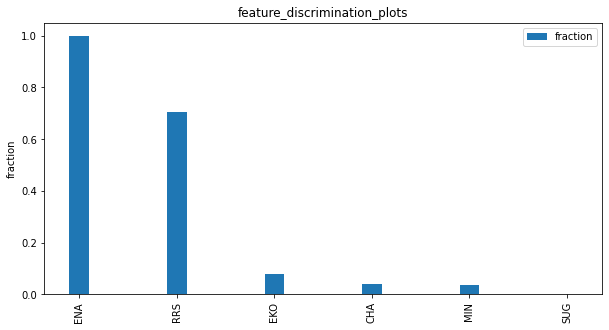

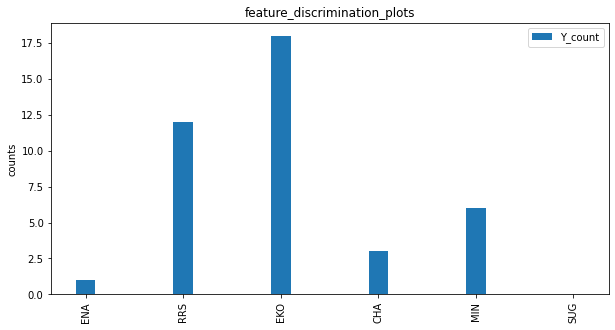

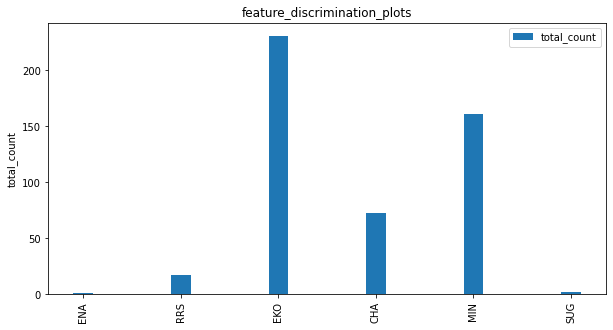

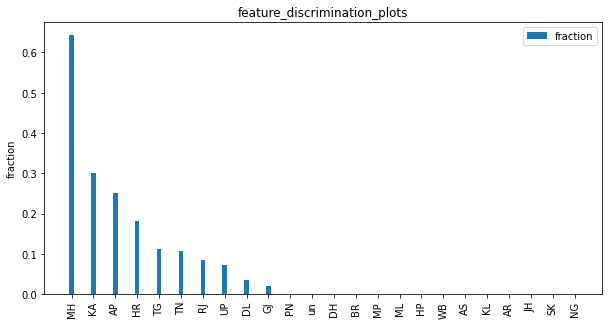

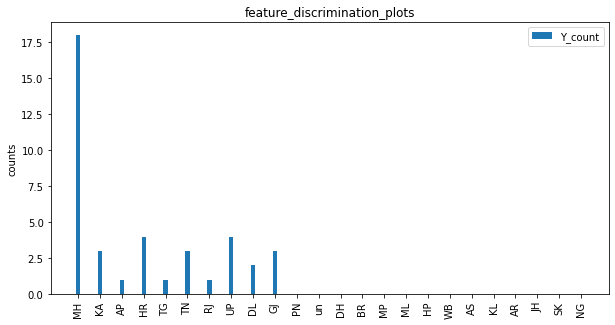

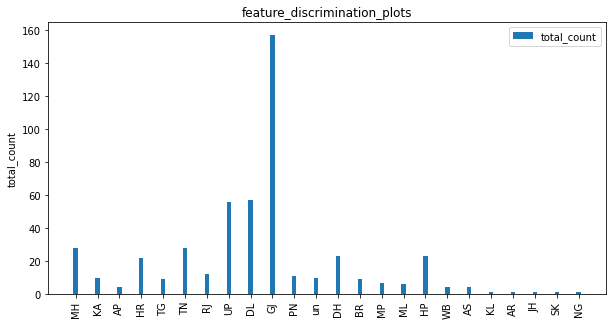

In [ ]:
feature_discrimination_plots(df,'enterpisePartner',Y_delinquent)
feature_discrimination_plots(df,'state',Y_delinquent)

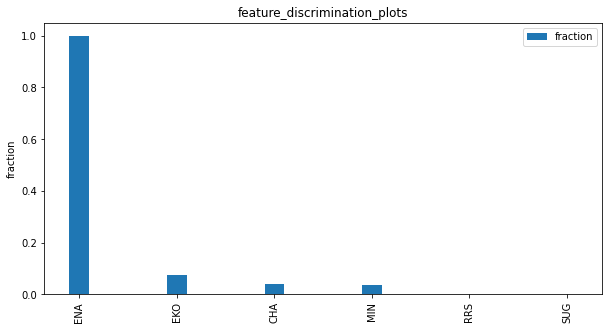

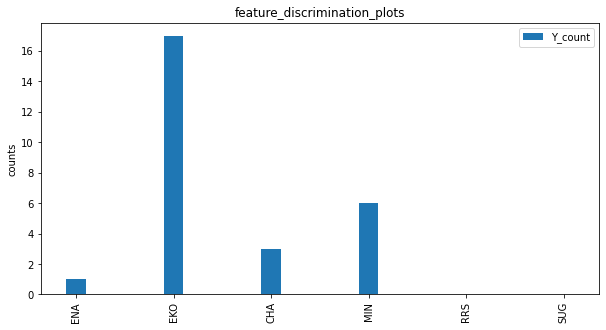

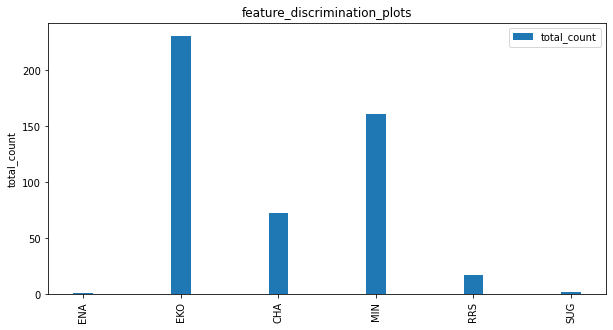

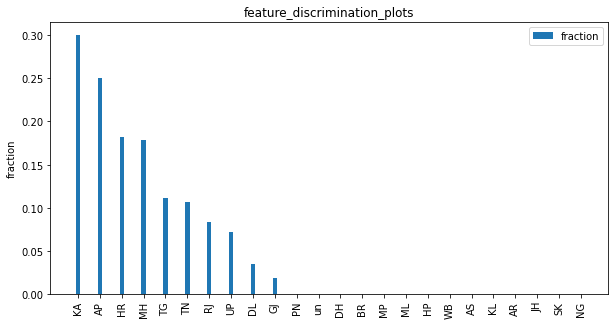

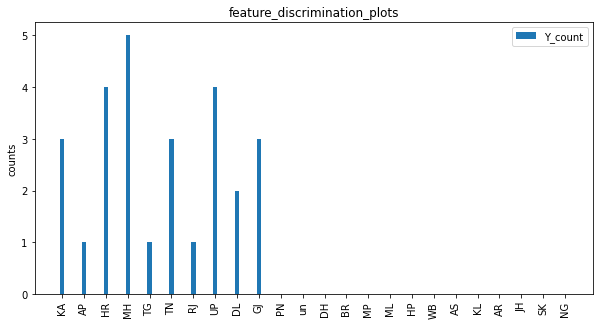

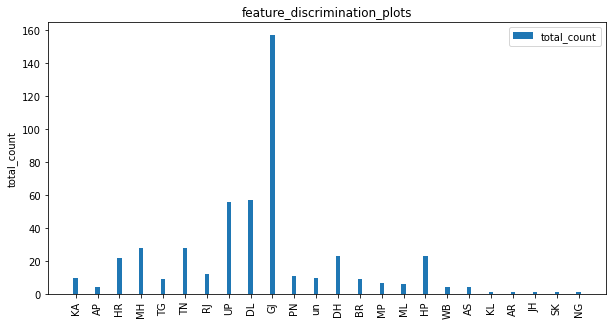

In [ ]:
feature_discrimination_plots(df,'enterpisePartner',Y_default)
feature_discrimination_plots(df,'state',Y_default)

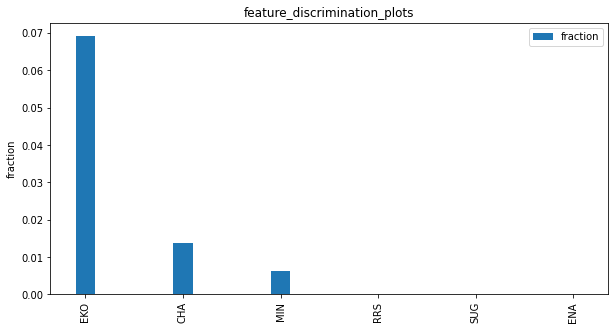

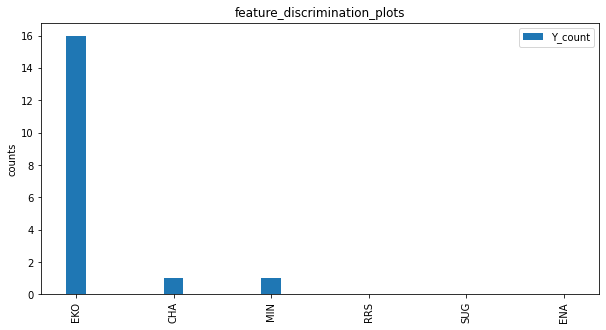

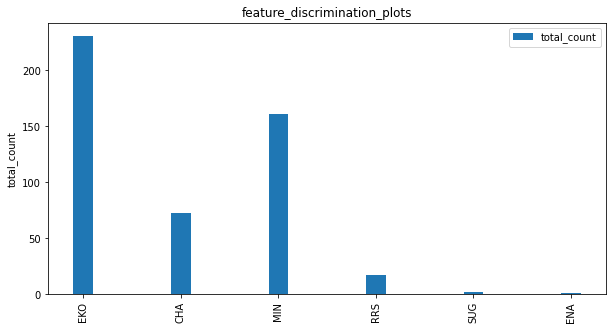

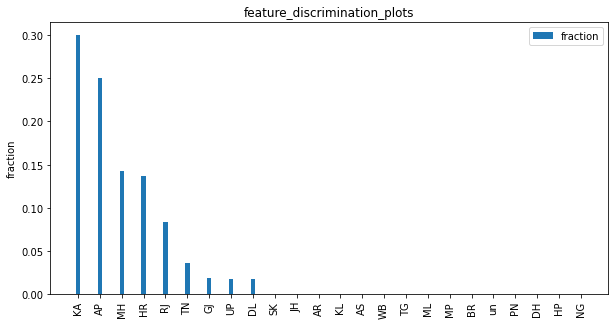

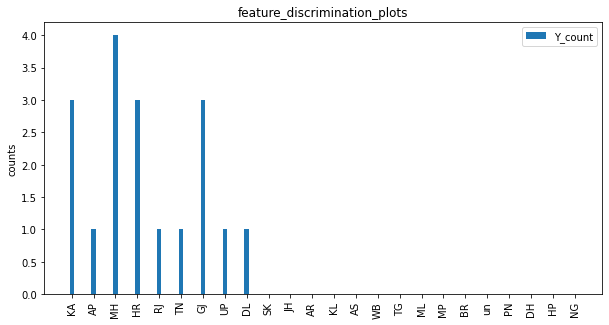

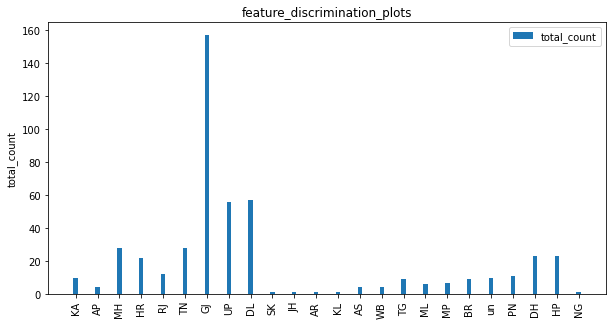

In [ ]:
feature_discrimination_plots(df,'enterpisePartner',Y_writeOff)
feature_discrimination_plots(df,'state',Y_writeOff)


 homeOwnershipType 

 
 Y_delinquent


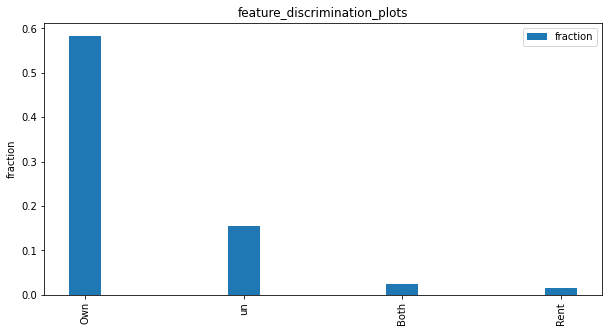

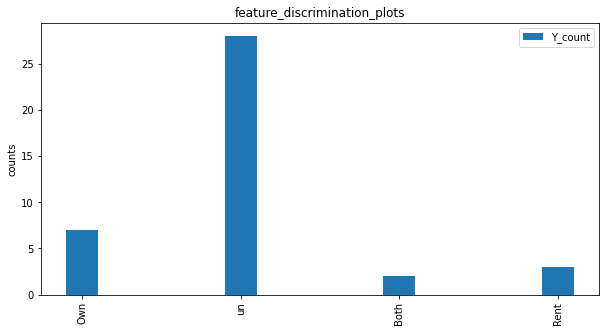

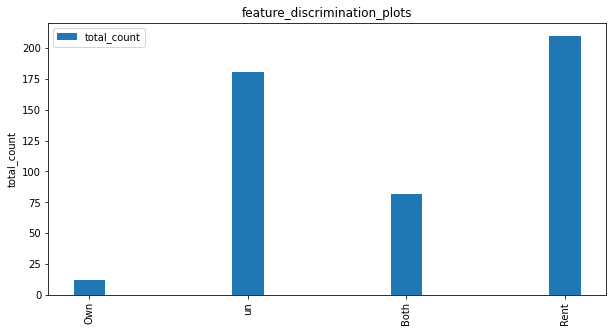



 
 Y_default


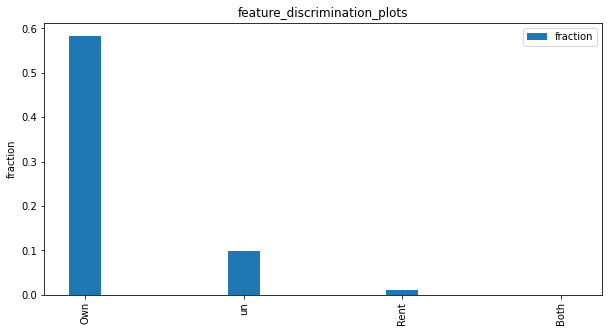

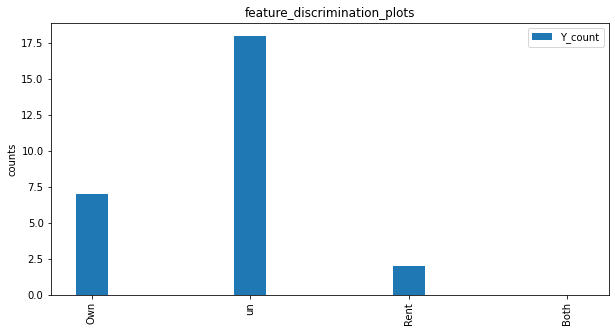

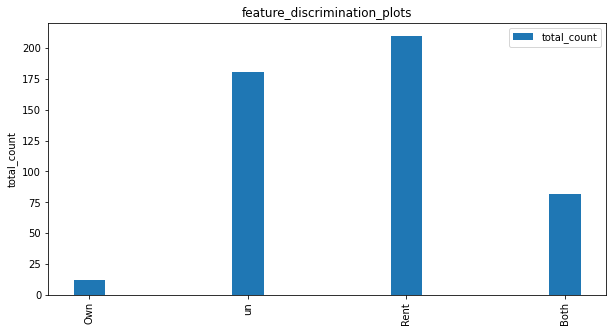



 
 Y_writeOff


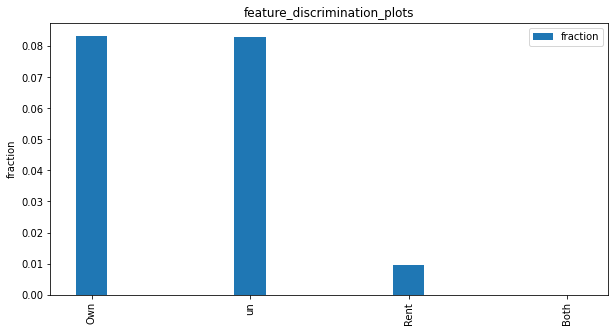

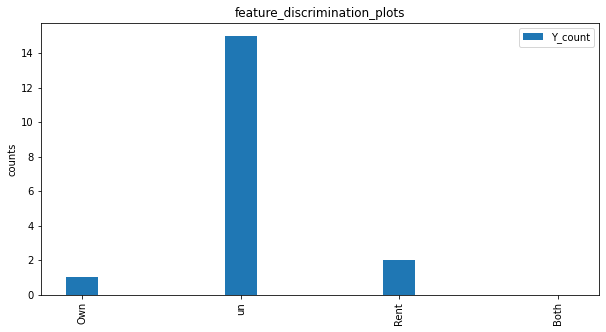

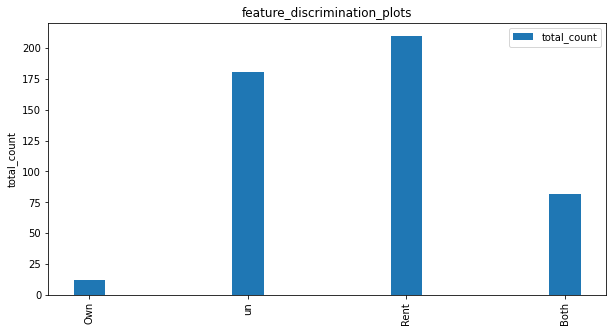


 vehicle 

 
 Y_delinquent


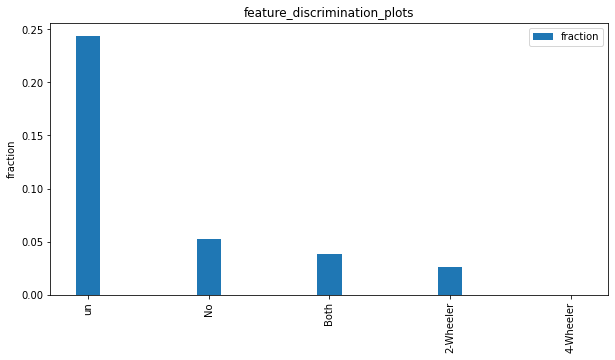

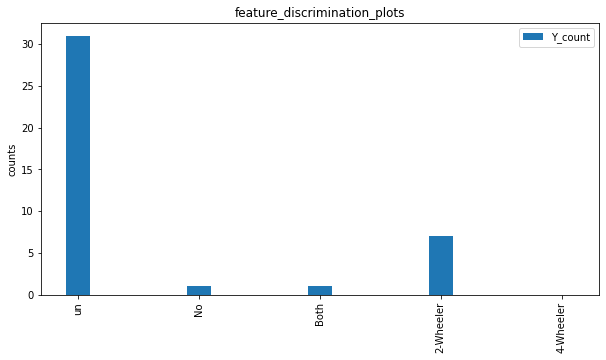

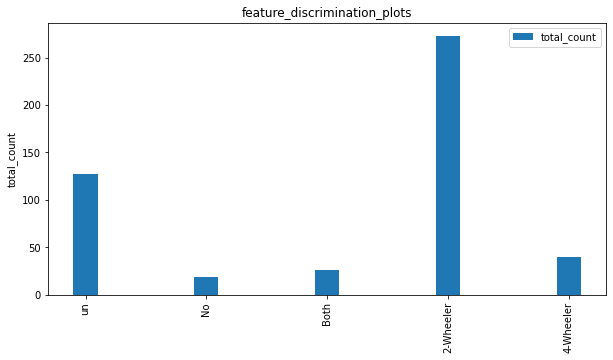



 
 Y_default


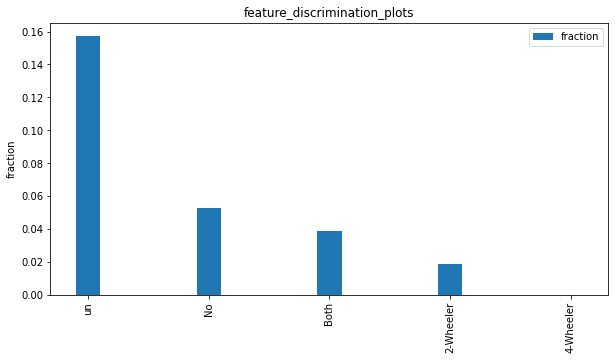

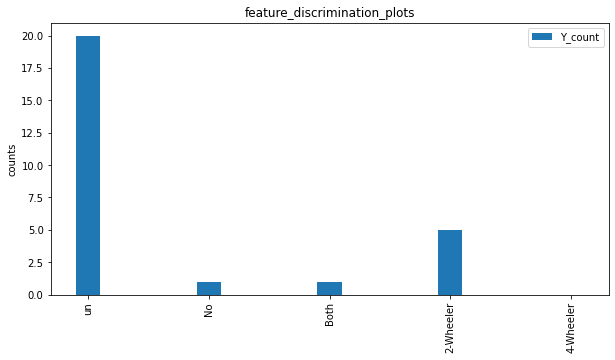

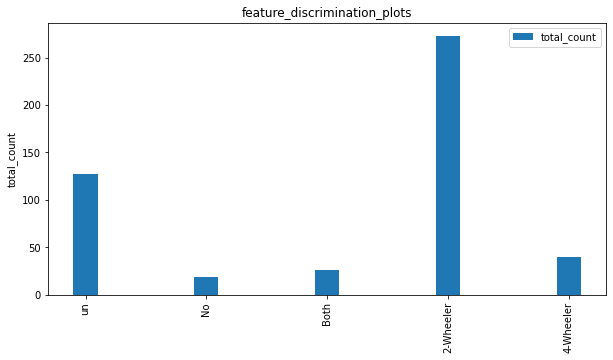



 
 Y_writeOff


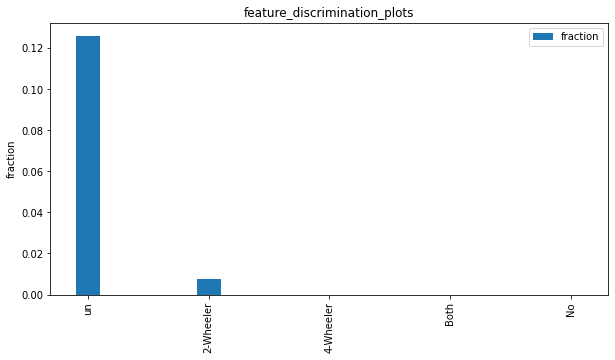

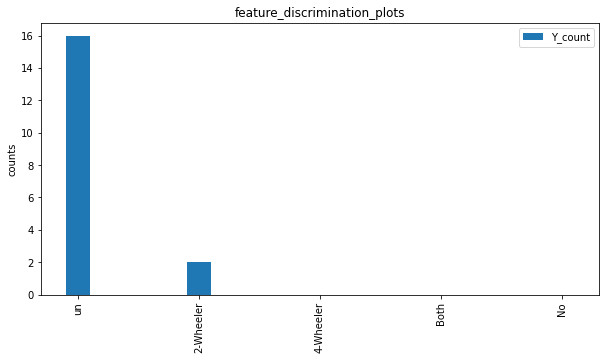

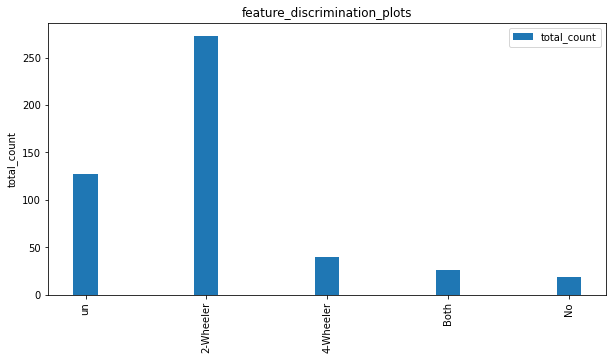


 degree 

 
 Y_delinquent


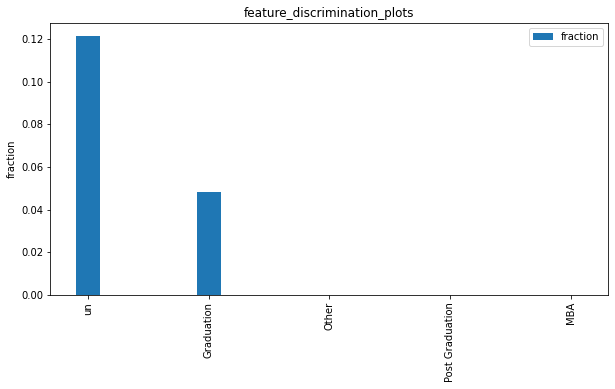

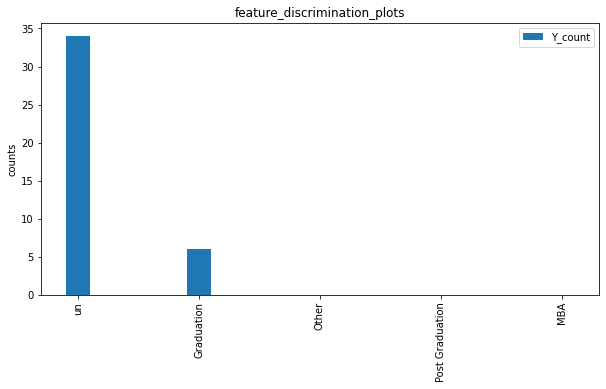

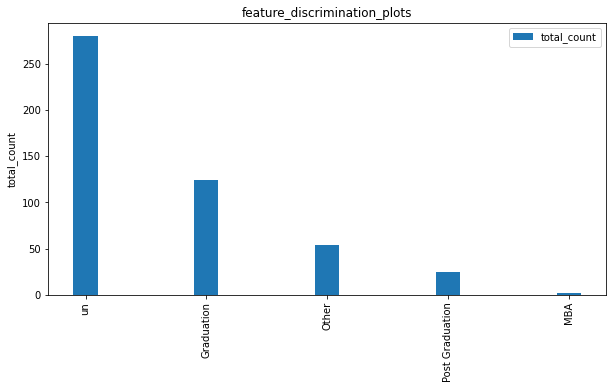



 
 Y_default


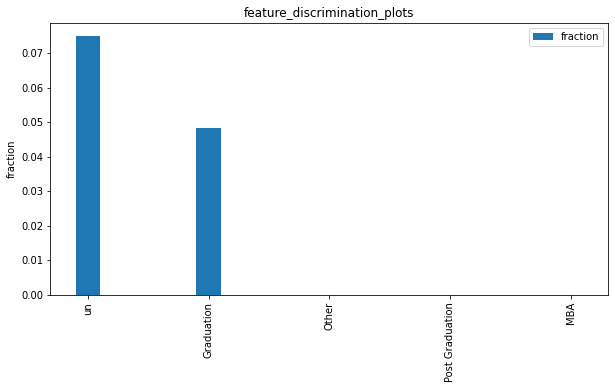

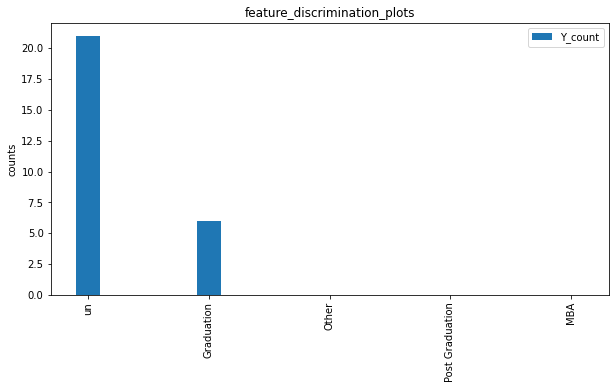

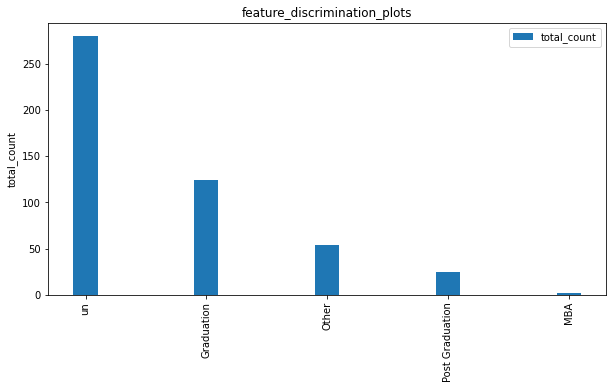



 
 Y_writeOff


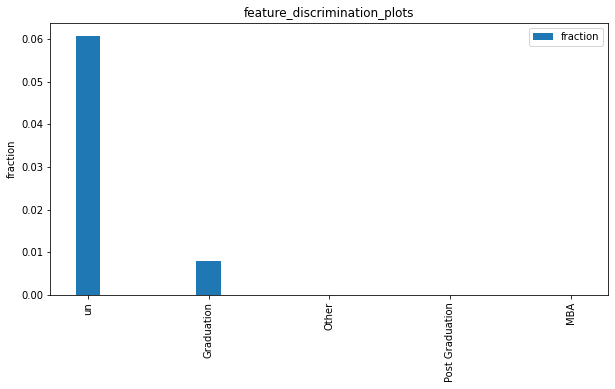

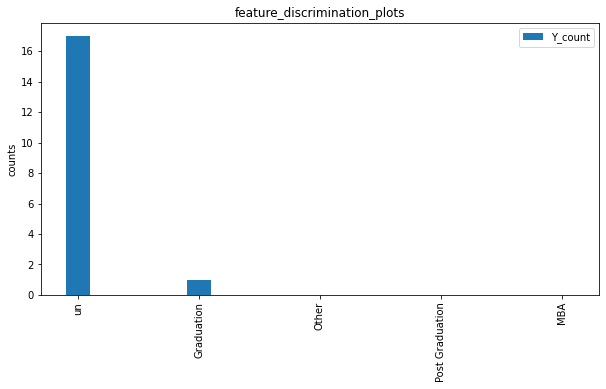

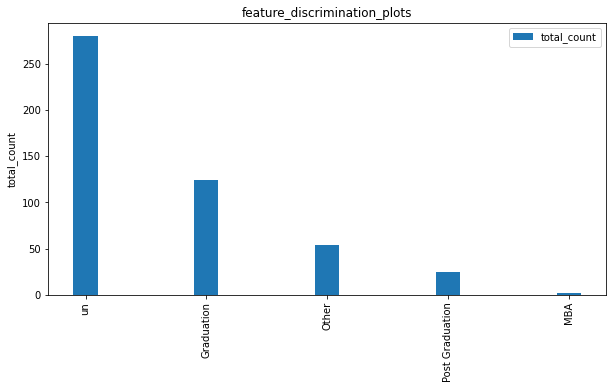


 jobType 

 
 Y_delinquent


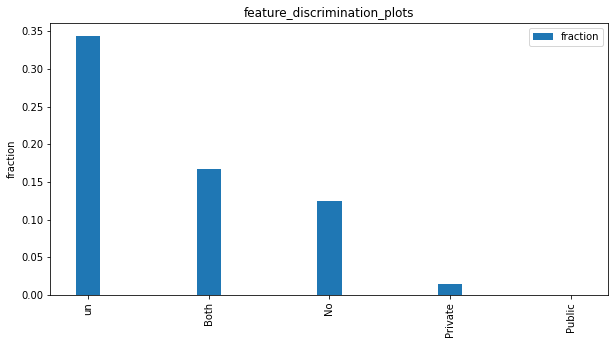

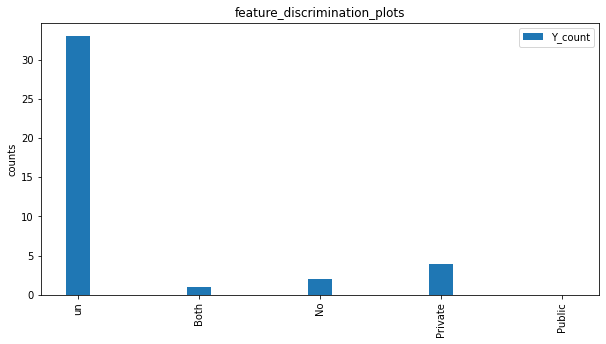

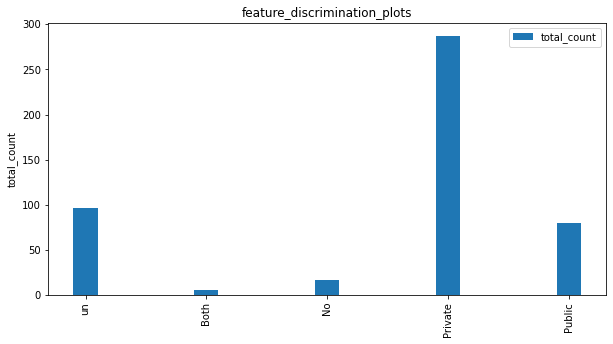



 
 Y_default


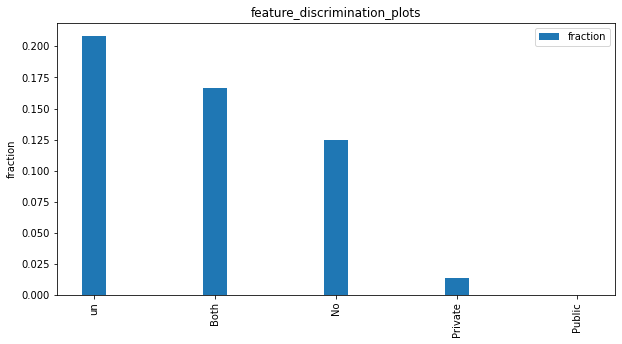

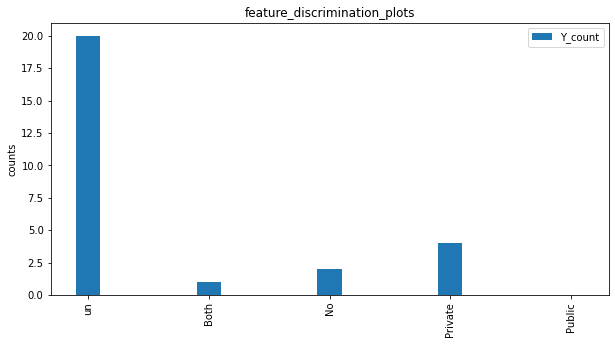

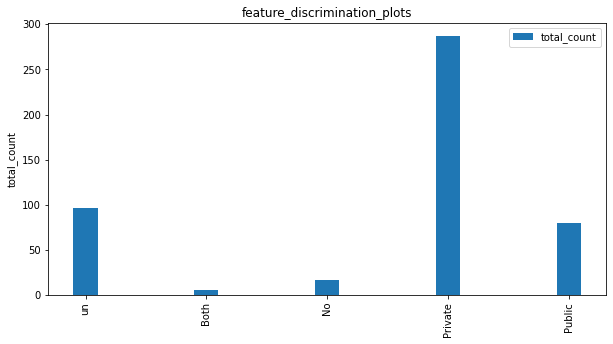



 
 Y_writeOff


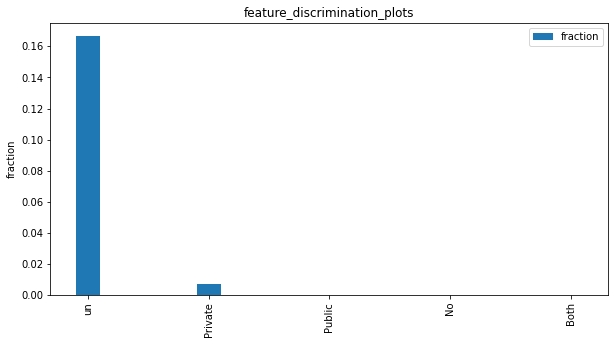

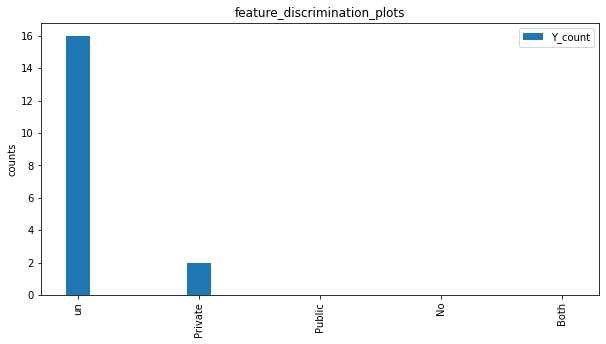

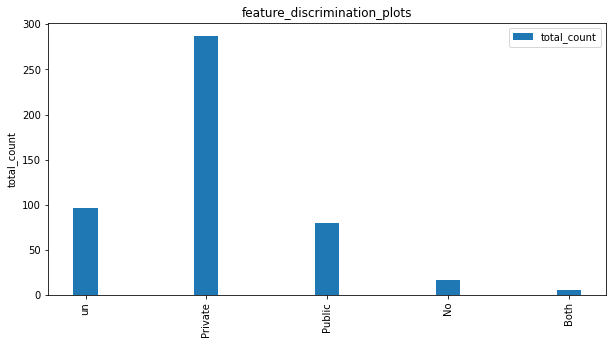


 enterpisePartner 

 
 Y_delinquent


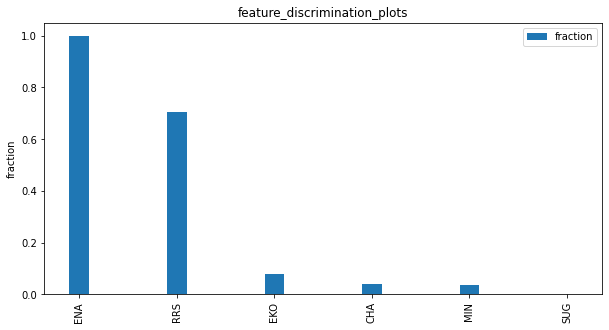

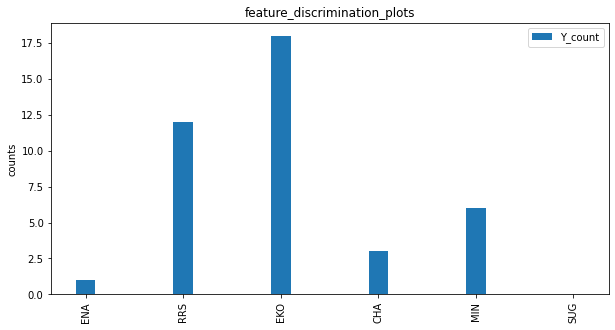

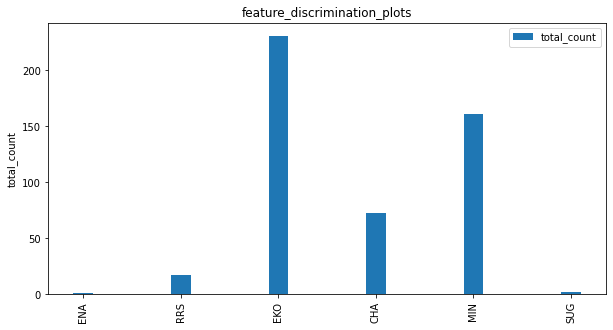



 
 Y_default


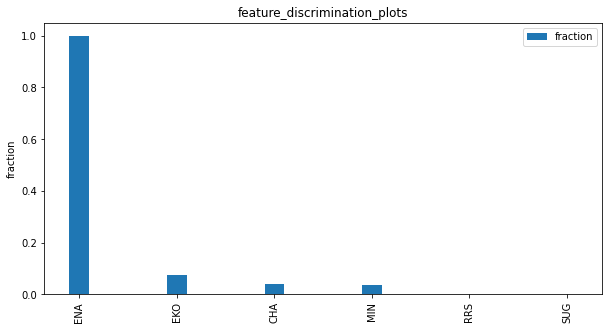

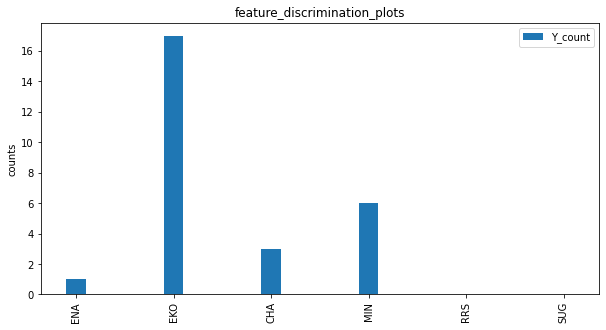

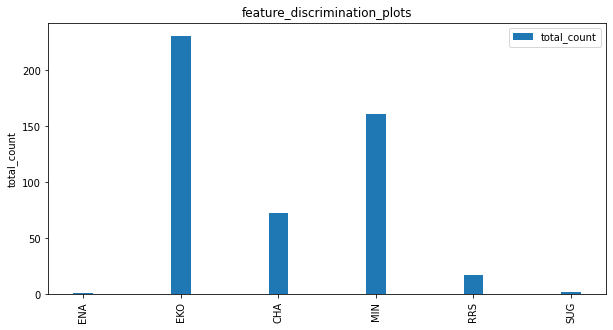



 
 Y_writeOff


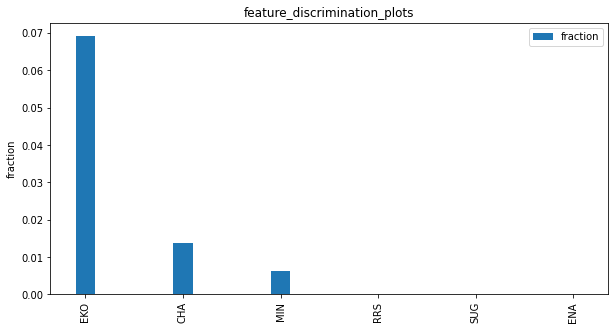

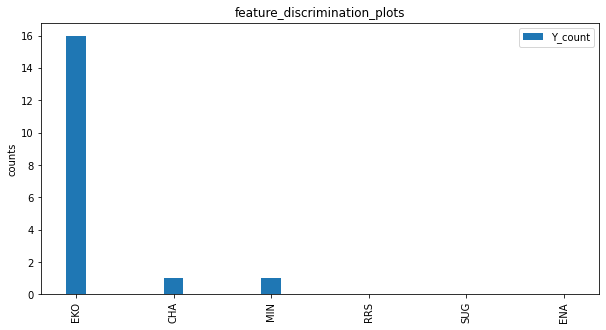

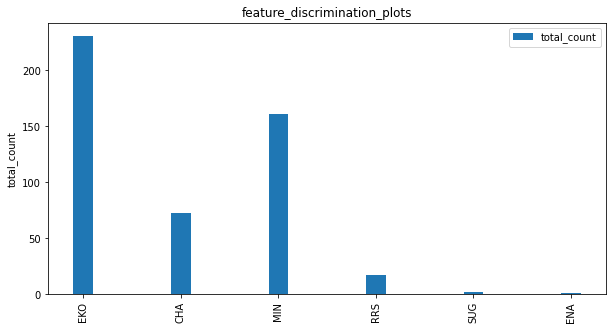


 state 

 
 Y_delinquent


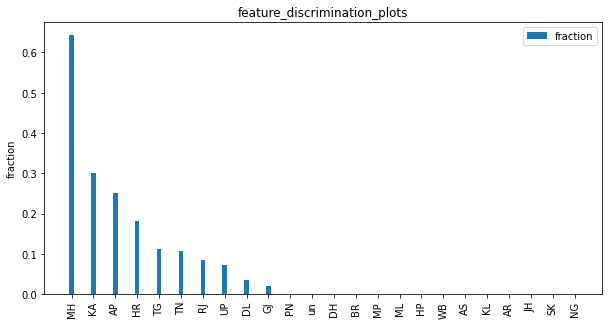

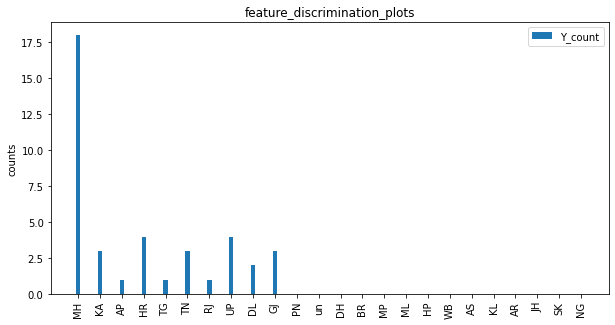

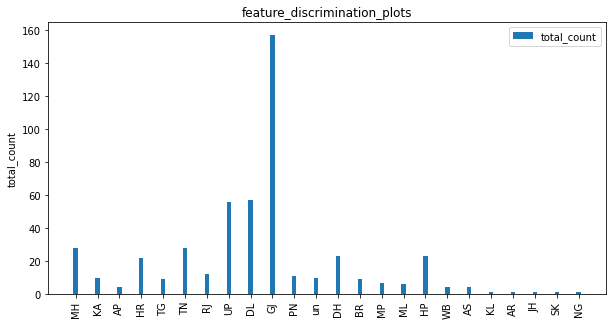



 
 Y_default


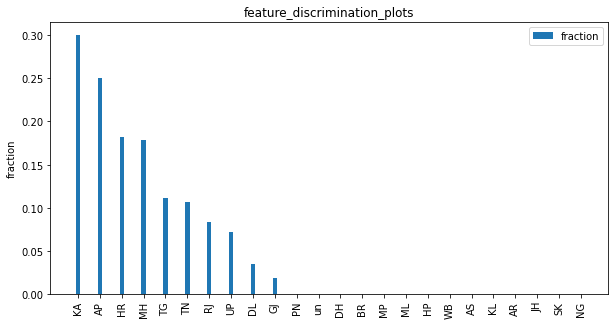

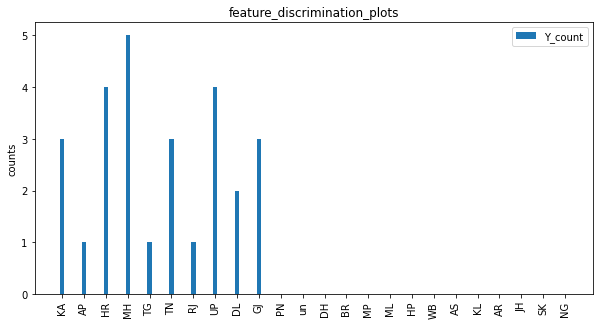

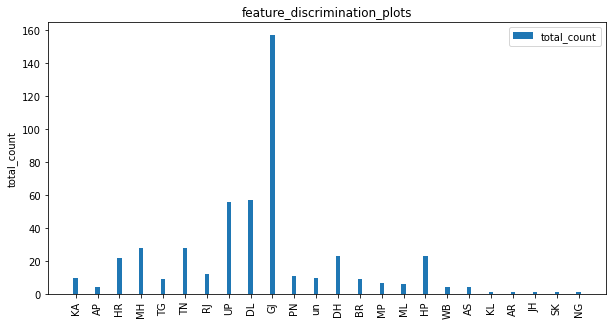



 
 Y_writeOff


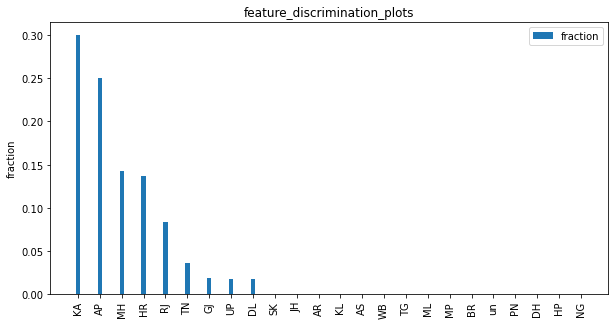

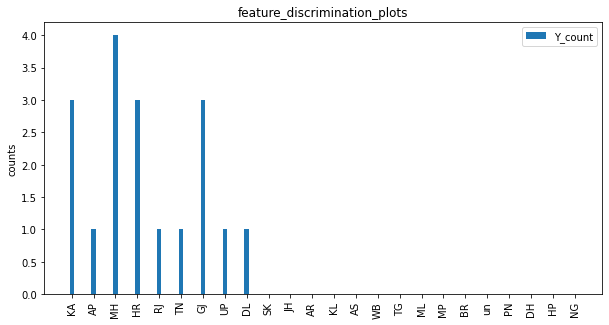

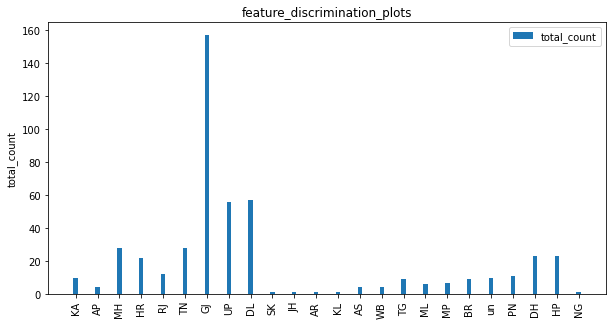


 children 

 
 Y_delinquent


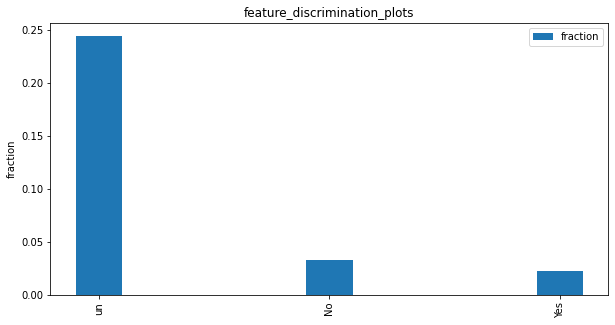

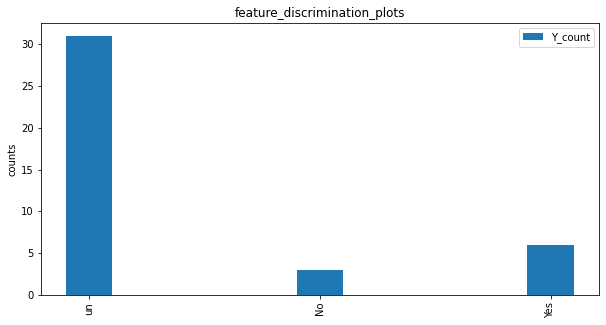

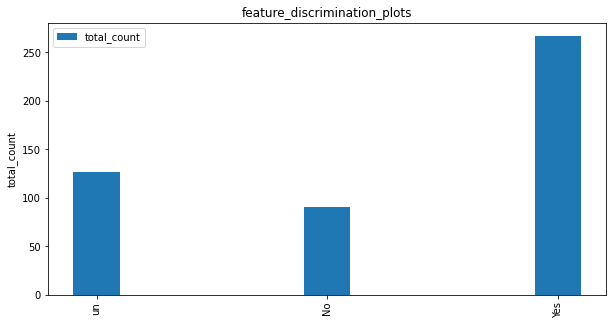



 
 Y_default


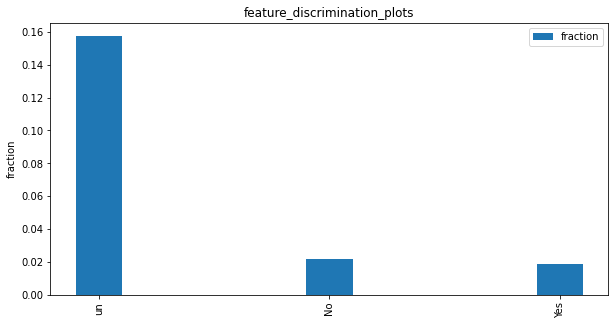

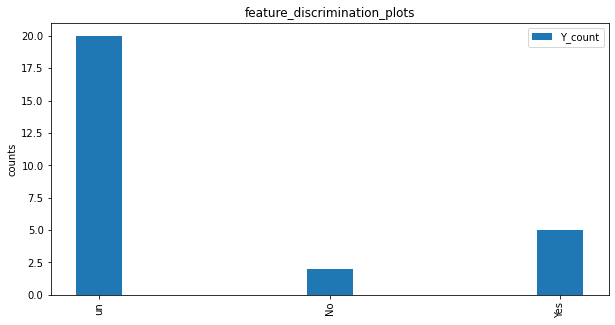

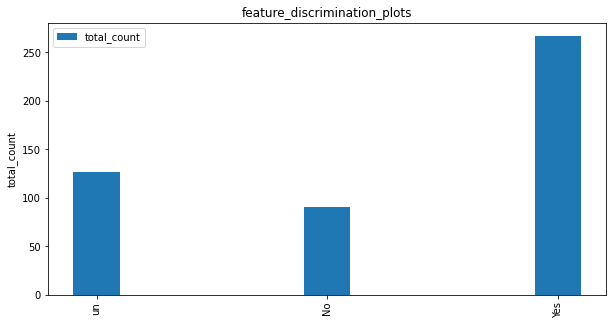



 
 Y_writeOff


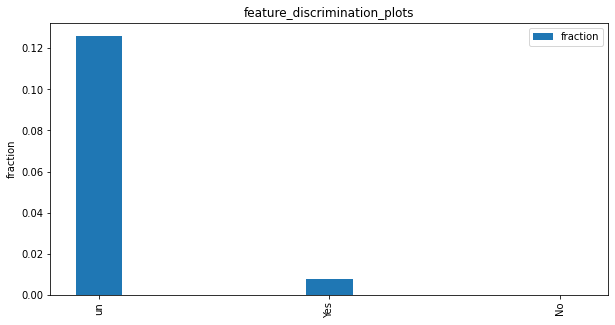

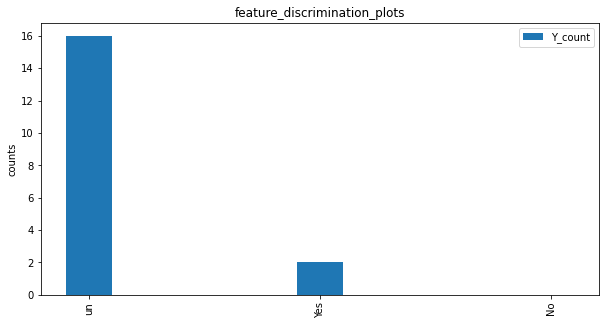

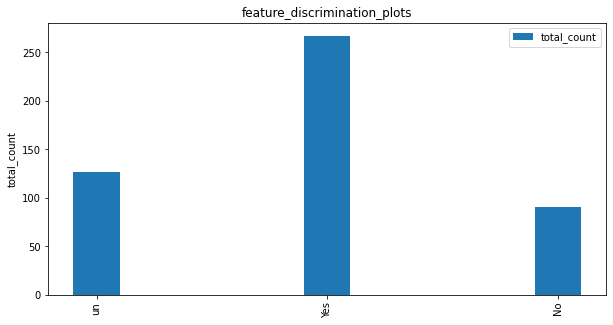


 maritalStatus 

 
 Y_delinquent


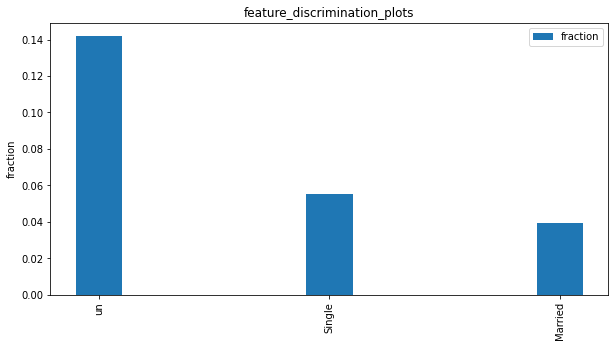

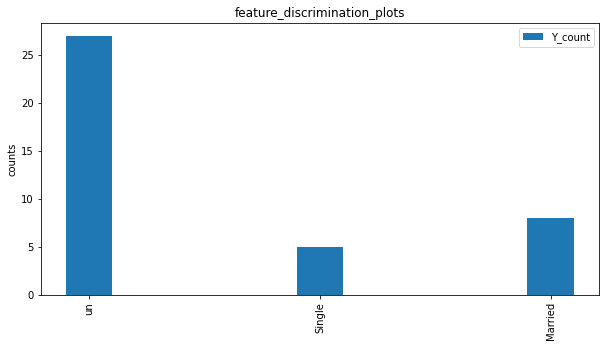

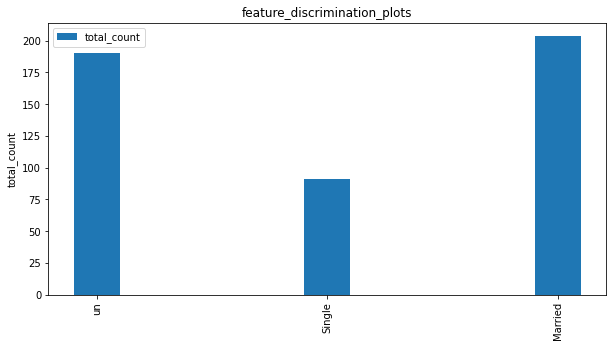



 
 Y_default


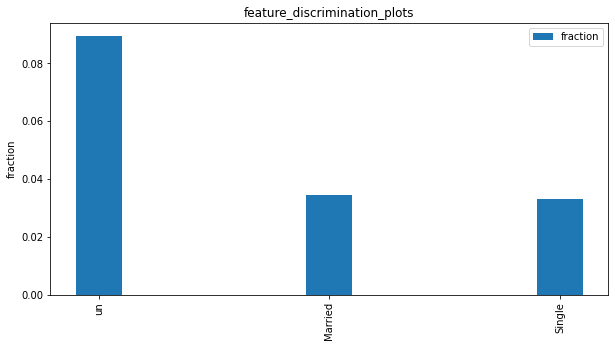

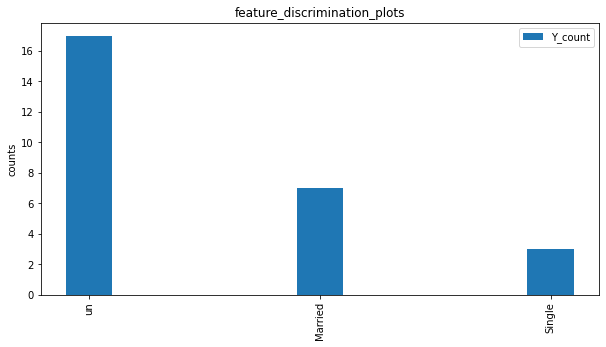

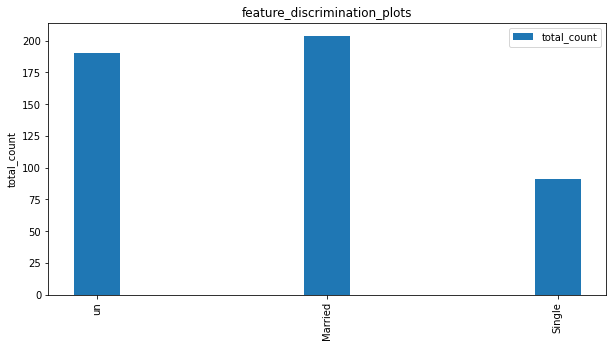



 
 Y_writeOff


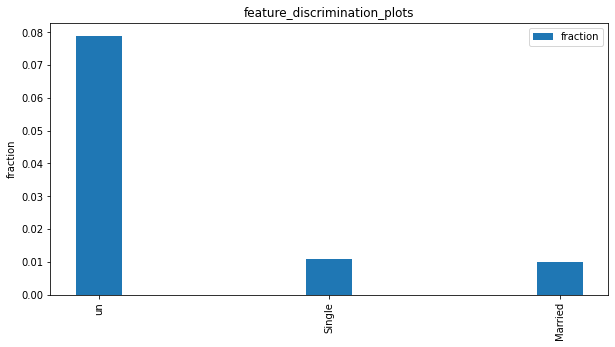

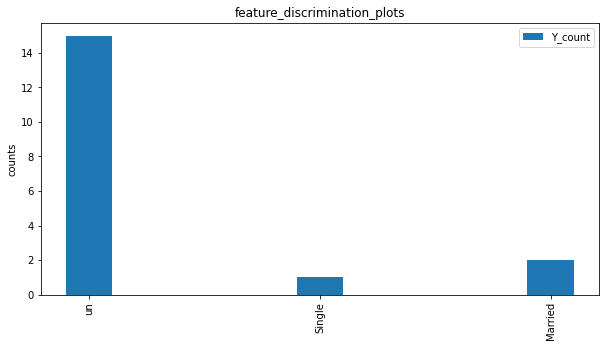

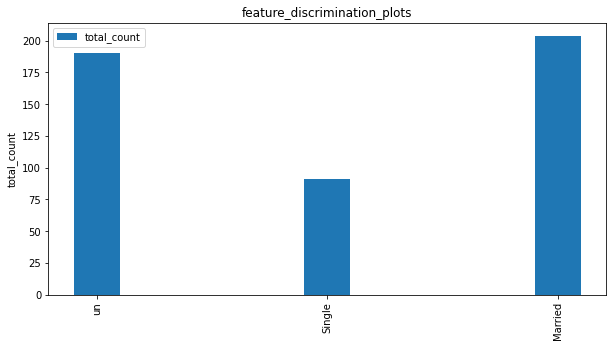


 gender 

 
 Y_delinquent


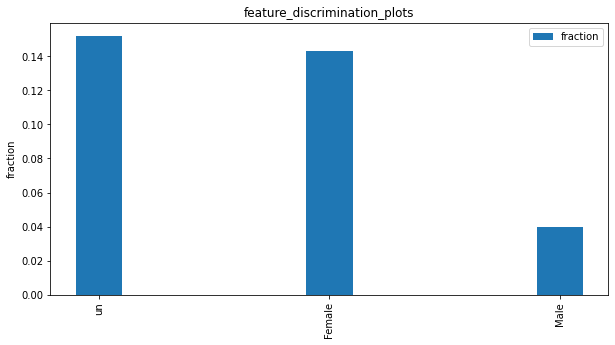

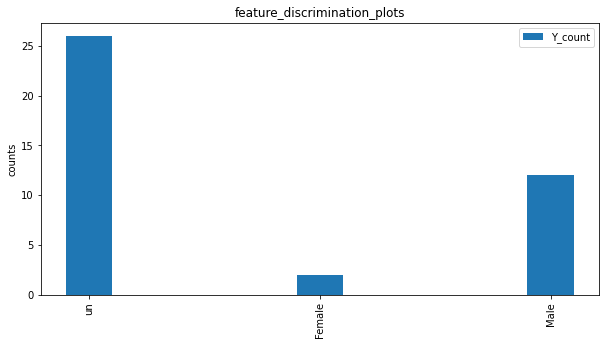

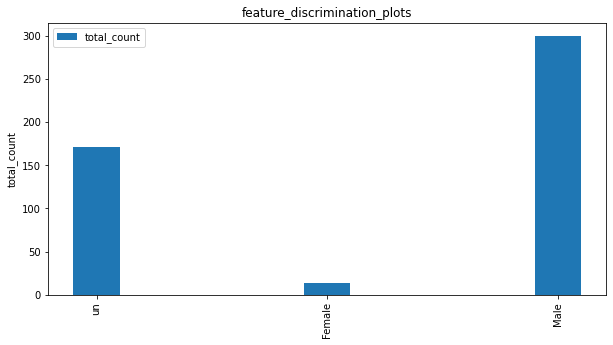



 
 Y_default


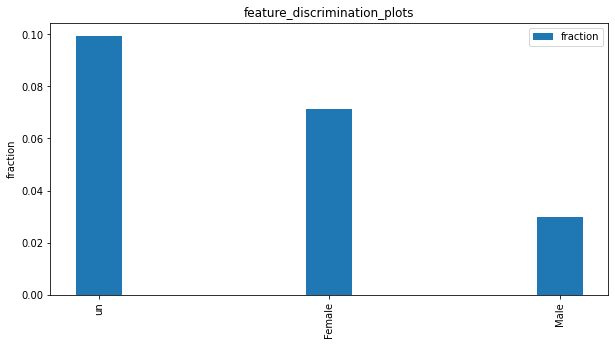

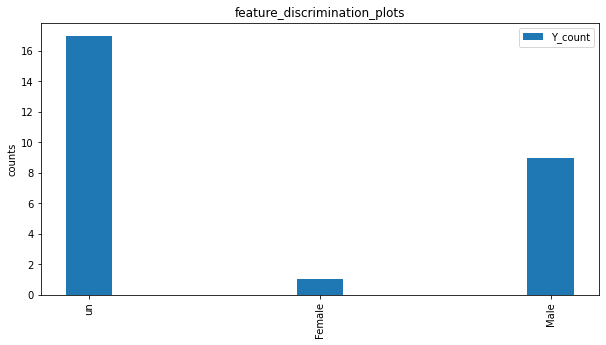

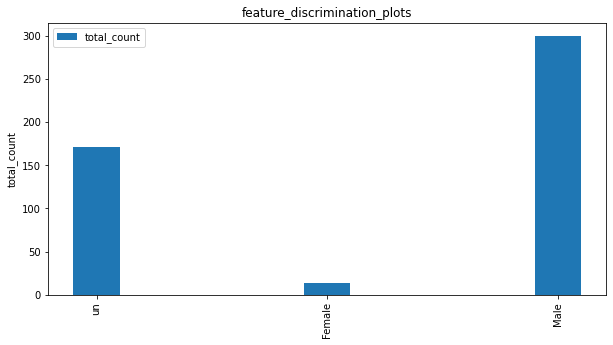



 
 Y_writeOff


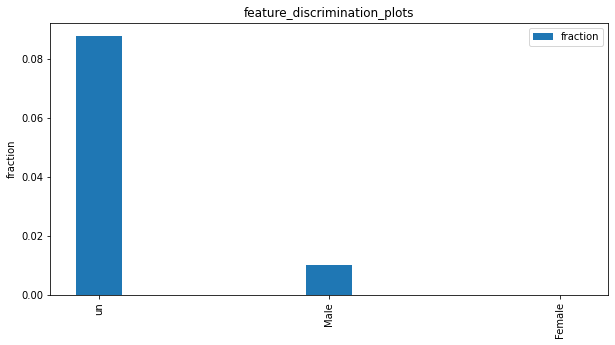

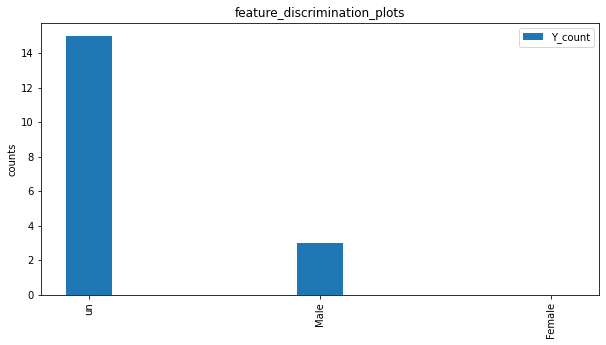

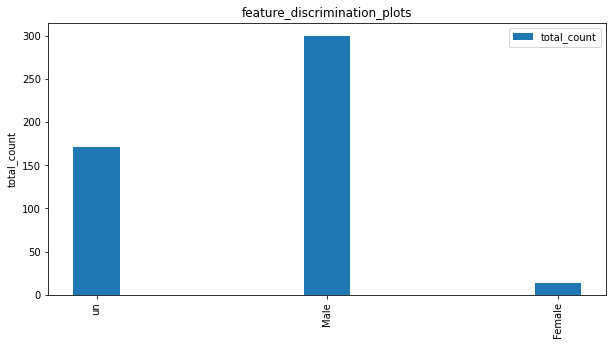


 whatsApp 

 
 Y_delinquent


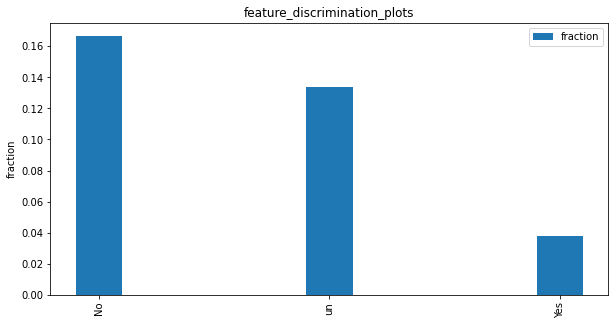

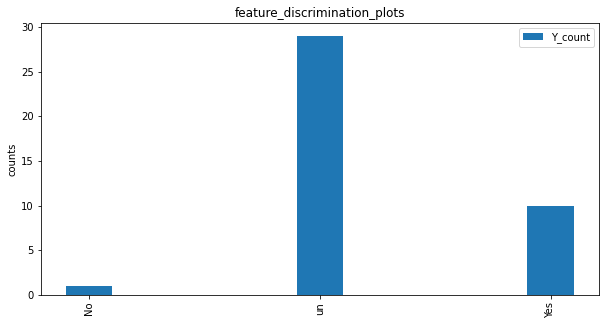

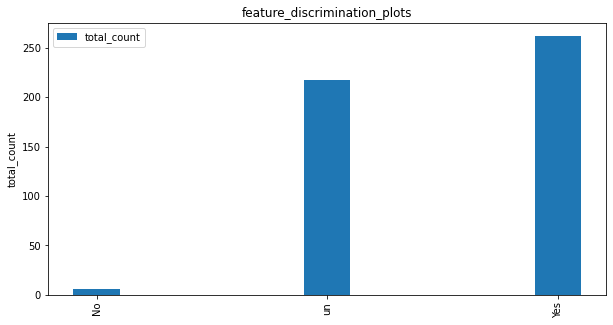



 
 Y_default


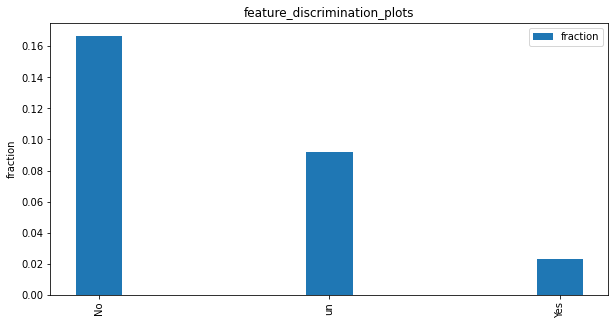

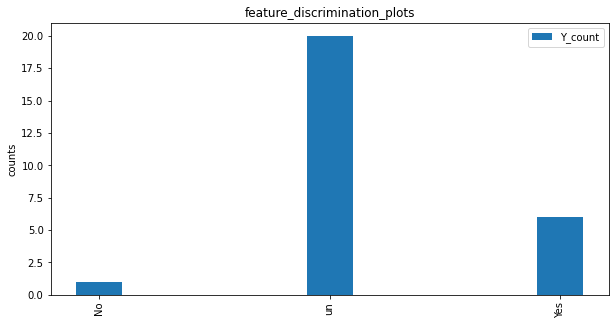

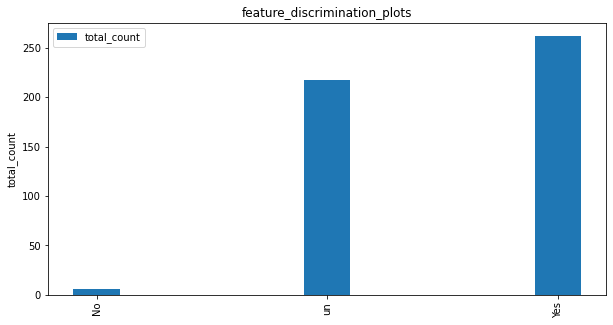



 
 Y_writeOff


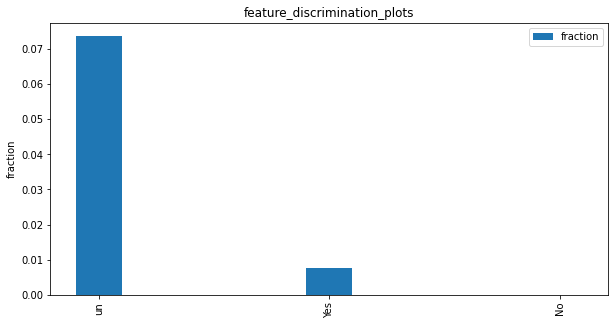

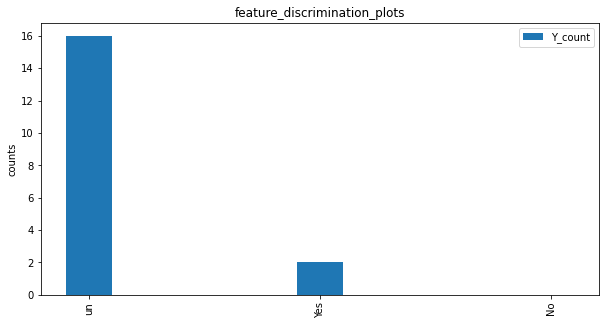

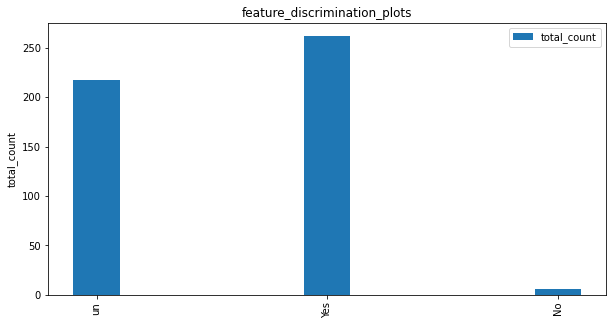


 purchasedInOneYear 

 
 Y_delinquent


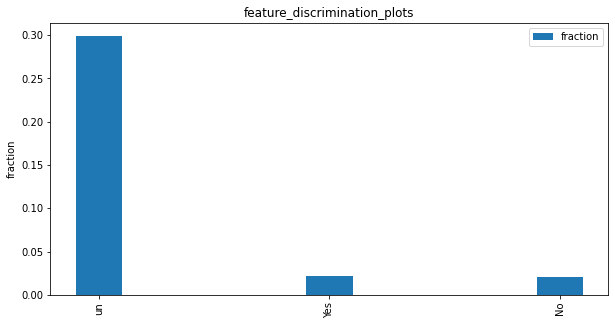

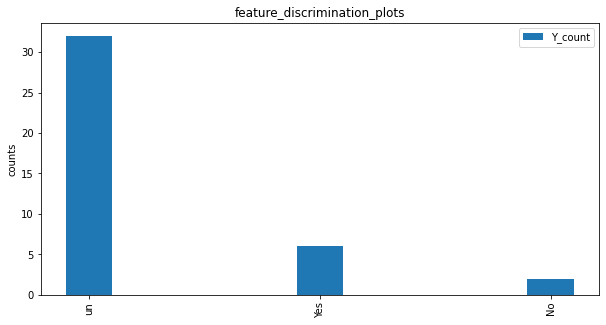

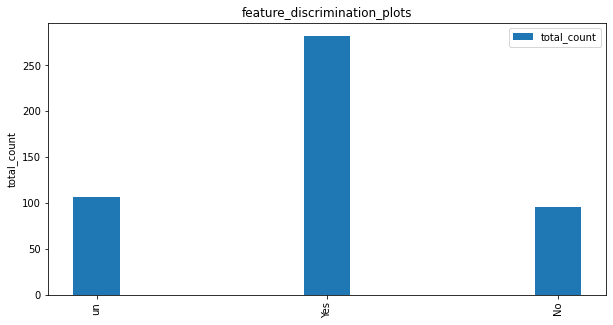



 
 Y_default


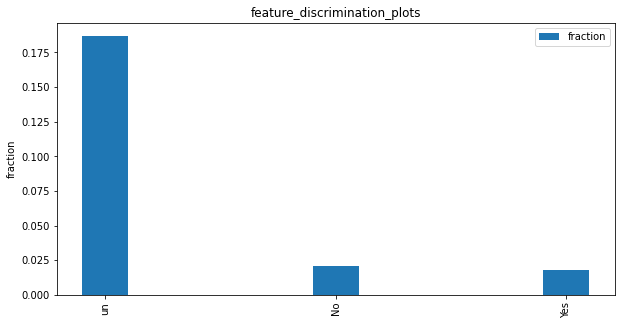

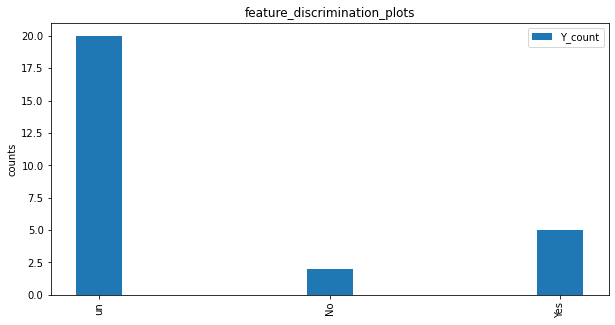

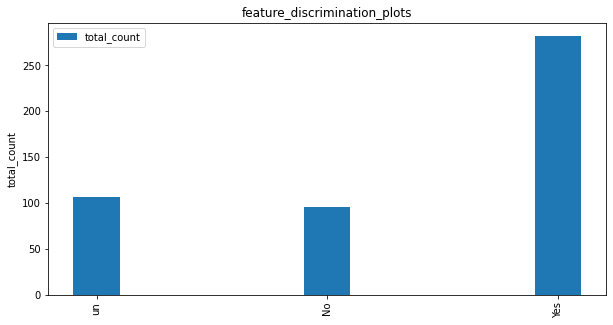



 
 Y_writeOff


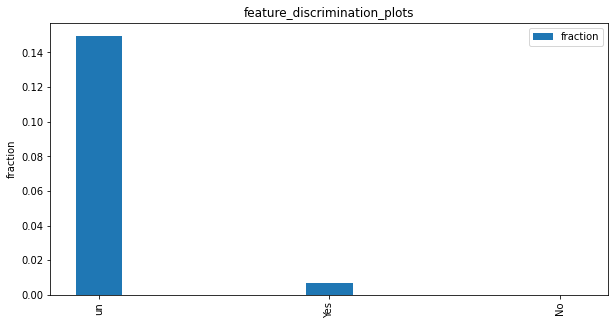

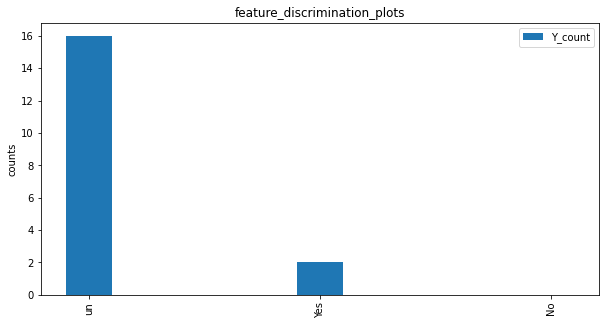

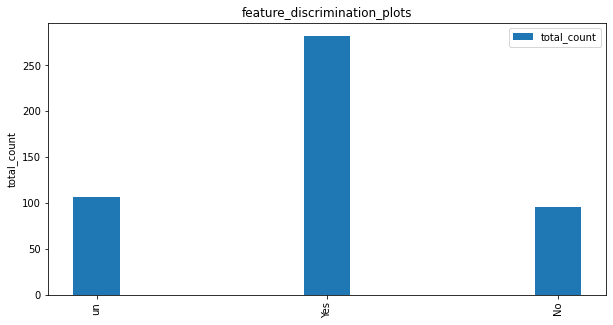


 recommended 

 
 Y_delinquent


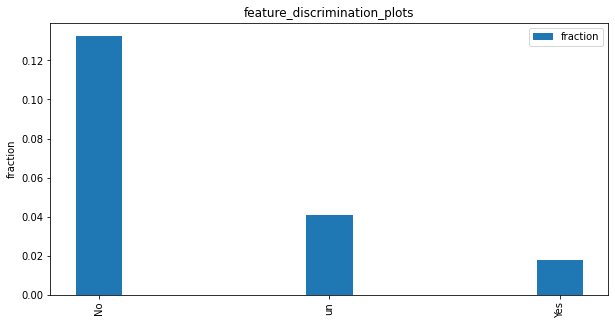

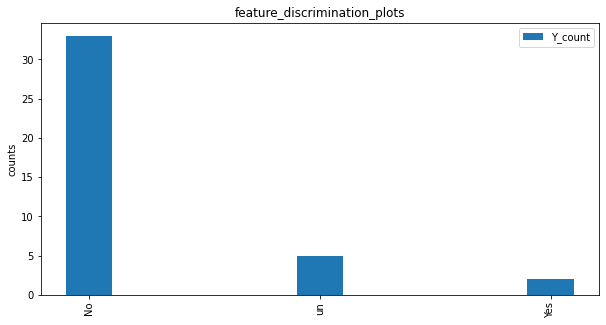

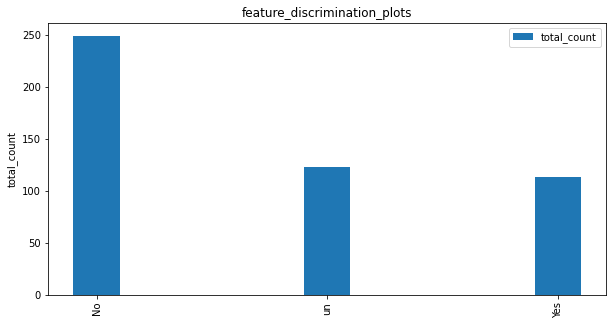



 
 Y_default


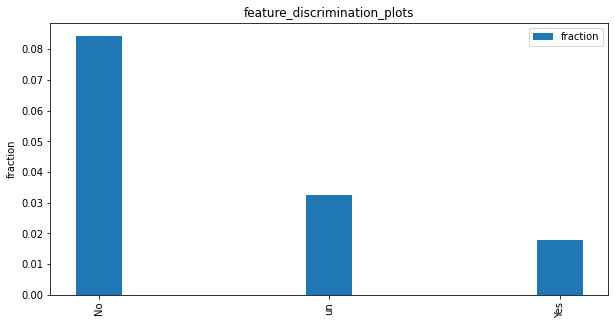

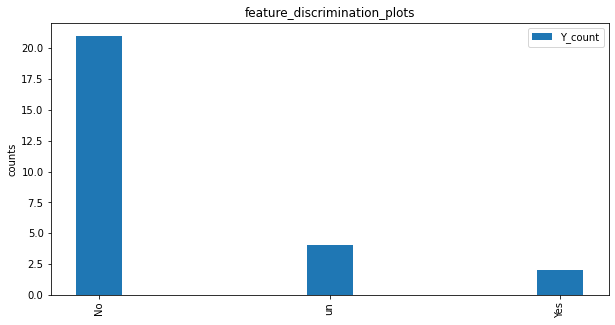

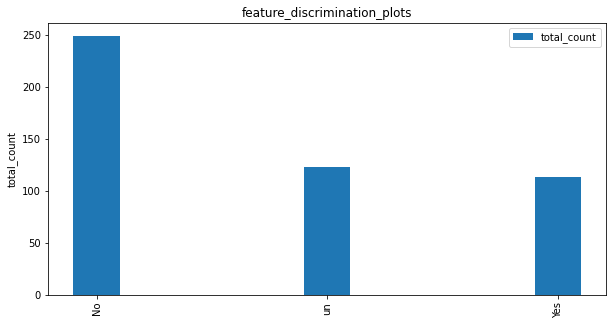



 
 Y_writeOff


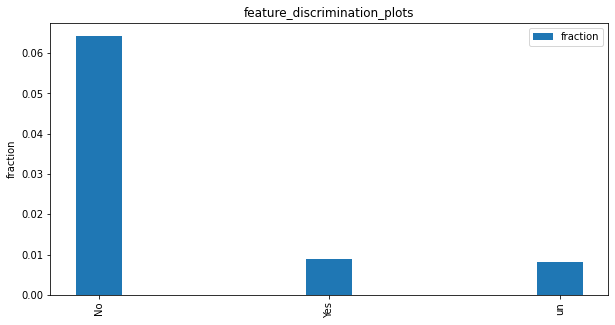

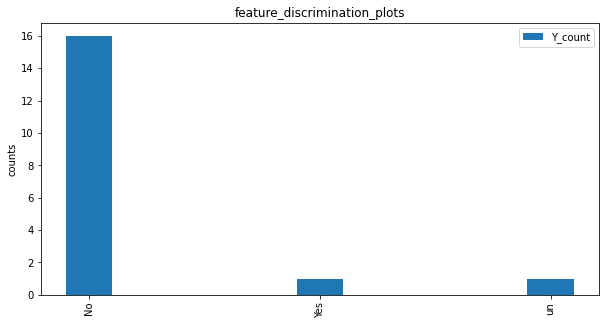

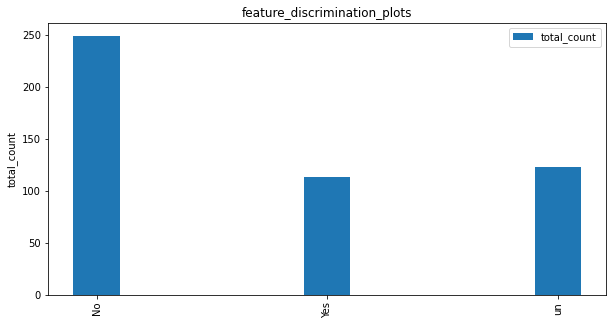

In [ ]:
catagorical_features = ['homeOwnershipType','vehicle','degree', 'jobType','enterpisePartner','state',
                        'children','maritalStatus','gender','whatsApp','purchasedInOneYear','recommended']
for col in catagorical_features:
  print("\n",col,"\n")
  print(" \n Y_delinquent")
  feature_discrimination_plots(df,col,Y_delinquent) 
  print("\n")
  print(" \n Y_default")
  feature_discrimination_plots(df,col,Y_default) 
  print("\n")
  print(" \n Y_writeOff")
  feature_discrimination_plots(df,col,Y_writeOff) 
  

* **mutual information**

In [ ]:
def mutual_information(df,Y):

  # get the data
  df_mi = df.copy()
  df_mi.drop(columns=['userId', 'loanId',  'writeOff', 'default', 'delinquent'] , axis=1, inplace = True)
  df_mi = scaling_function('max_abs',df_mi)
  features = np.array(df_mi.columns)
  #print(features)

  # encoding of catagorical_variables
  le = LabelEncoder()
  catagorical_features = ['enterpisePartner', 'state', 'whatsApp', 'gender', 'maritalStatus', 'children',
                          'degree', 'jobType', 'homeOwnershipType', 'vehicle', 'purchasedInOneYear', 'recommended']
  # handeling unknown states of catagorical_variables and finding mutual_information
  dict_mi = []
  index_c = len(catagorical_features)
  exception = []
  for col in features:
    index_un=[]
    for i in range(len(df_mi)):
      if(df_mi[col][i]=='un'):
        index_un.append(i);
    dft = df_mi.copy()
    Yt  = Y.copy()
    dft = dft.drop(index = index_un,axis=0).reset_index(drop=True)
    Yt  = Yt.drop(index = index_un,axis=0).reset_index(drop=True)
    entropy_Yft = entropy(Yt)
    if (entropy_Yft<=0):
      index_c = index_c-1
      exception.append(col)
      continue;
    mi_dict = []
    random.seed(9001)
    if (index_c>0):
      dft[col] = le.fit_transform(dft[col])
    for i in range(0,150): #
      random_ = random.randint(20,200)
      dfc = (dft[col].to_numpy())
      dfc = dfc.reshape(dfc.size,1)
      a   = []
      a.append(0)
      if (index_c>0):
        mi  = pd.DataFrame(feature_selection.mutual_info_classif(dfc, Yt, discrete_features=a, n_neighbors=3, copy=True, random_state=random_))
      else:
        #print(col)
        mi  = pd.DataFrame(feature_selection.mutual_info_classif(dfc, Yt, discrete_features='auto', n_neighbors=3, copy=True, random_state=random_))
      mi_dict.append(mi/entropy_Yft)
    #print(entropy_Yft)
    dict_mi.append(mi_dict)
    index_c = index_c-1

  #features = list(set(features) - set(exception))
  for i in exception:
    indices = np.where(features==i)
    features = np.delete(features, indices)

  std_mi        = []
  mean_mi       = []
  median_mi     = []
  percentile_mi = []
  
  for i in range(len(features)):
    if (mean(dict_mi[i])!= 'inf'):
      #print((dict_mi[i]))
      std_mi.append(std(dict_mi[i]))
      mean_mi.append(mean(dict_mi[i]))
      median_mi.append(median(dict_mi[i]))
      percentile_mi.append(percentile(dict_mi[i],q=95))
    else:
      exception.append(i)  
 
  mi_df = pd.DataFrame(np.hstack((np.array([features]).T, np.array([std_mi]).T, np.array([mean_mi]).T, np.array([median_mi]).T, np.array([percentile_mi]).T)),
                       columns=['feature', 'std', 'mean', 'median', 'percentile'])
  # fig 1 all 4
  Mi_Df = pd.DataFrame(mi_df.sort_values(by='mean', ascending=False).head(25)) ## sort by mean
  print(Mi_Df)
  if (len(exception)):
    print("\n NO data available for features: ",exception)
  plt.figure(figsize = (10,5)) #
  X_axis = np.arange(len(Mi_Df['feature']))
  plt.bar(X_axis - 0.4,Mi_Df['percentile'], width= 0.2, label = 'percentile')
  plt.bar(X_axis - 0.2,Mi_Df['mean'],       width= 0.2, label = 'mean')
  plt.bar(X_axis + 0.0,Mi_Df['median'],     width= 0.2, label = 'median')
  plt.bar(X_axis + 0.2,Mi_Df['std'],        width= 0.2, label = 'std')
  plt.ylabel('mutual_information')
  plt.xticks(X_axis, Mi_Df['feature'])
  plt.xticks(rotation=90)
  plt.title("mutual_information")
  plt.legend()
  plt.show()
  # fig 2 mean and std
  plt.figure(figsize = (10,5)) #
  X_axis = np.arange(len(Mi_Df['feature']))
  #plt.bar(X_axis,Mi_Df['mean'],       width= 0.4, label = 'mean')
  plt.bar(X_axis - 0.2,Mi_Df['mean'],       width= 0.4, label = 'mean')
  plt.bar(X_axis + 0.2,Mi_Df['std'],        width= 0.4, label = 'std')
  plt.ylabel('mutual_information')
  plt.xticks(X_axis, Mi_Df['feature'])
  plt.xticks(rotation=90)
  plt.title("mutual_information")
  plt.legend()
  plt.show()
  # fig 3 median and percentile
  Mi_Df = pd.DataFrame(mi_df.sort_values(by='median', ascending=False).head(25)) ## sort by median
  plt.figure(figsize = (10,5)) #
  X_axis = np.arange(len(Mi_Df['feature']))
  plt.bar(X_axis - 0.2,Mi_Df['percentile'], width= 0.4, label = 'percentile')
  plt.bar(X_axis + 0.2,Mi_Df['median'],     width= 0.4, label = 'median')
  plt.ylabel('mutual_information')
  plt.xticks(X_axis, Mi_Df['feature'])
  plt.xticks(rotation=90)
  plt.title("mutual_information")
  plt.legend()
  plt.show()

'''
['enterpisePartner' 'state' 'whatsApp' 'gender' 'maritalStatus' 'children'
 'degree' 'jobType' 'homeOwnershipType' 'vehicle' 'purchasedInOneYear'
 'recommended' 'trans_count_mean' 'trans_count_std' 'trans_count_skews'
 'trans_count_kurtosis' 'trans_vol_mean' 'trans_vol_std' 'trans_vol_skews'
 'trans_vol_kurtosis' 'ValuePerCount_mean' 'ValuePerCount_std'
 'ValuePerCount_skews' 'ValuePerCount_kurtosis']
'''

"\n['enterpisePartner' 'state' 'whatsApp' 'gender' 'maritalStatus' 'children'\n 'degree' 'jobType' 'homeOwnershipType' 'vehicle' 'purchasedInOneYear'\n 'recommended' 'trans_count_mean' 'trans_count_std' 'trans_count_skews'\n 'trans_count_kurtosis' 'trans_vol_mean' 'trans_vol_std' 'trans_vol_skews'\n 'trans_vol_kurtosis' 'ValuePerCount_mean' 'ValuePerCount_std'\n 'ValuePerCount_skews' 'ValuePerCount_kurtosis']\n"

 
 Y_delinquent
                   feature          std         mean       median   percentile
0         enterpisePartner            0    0.0173743    0.0173743    0.0173743
23  ValuePerCount_kurtosis   0.00273566    0.0142607    0.0140451    0.0191938
17           trans_vol_std   0.00276059    0.0111481    0.0111336    0.0161534
22     ValuePerCount_skews   0.00272268    0.0100587   0.00991092    0.0150082
12        trans_count_mean   0.00277174   0.00907349   0.00909004    0.0140458
6                   degree            0   0.00837236   0.00837236   0.00837236
20      ValuePerCount_mean   0.00273545   0.00832697   0.00811332     0.013262
14       trans_count_skews   0.00267216   0.00831332   0.00822265    0.0132328
1                    state            0   0.00793874   0.00793874   0.00793874
21       ValuePerCount_std   0.00273545   0.00780623   0.00759258    0.0127412
19      trans_vol_kurtosis   0.00273566   0.00778924   0.00757372    0.0127224
15    trans_count_kurtosis   0.00273

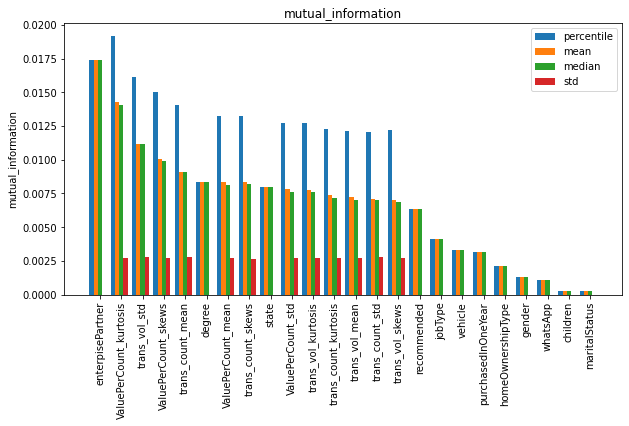

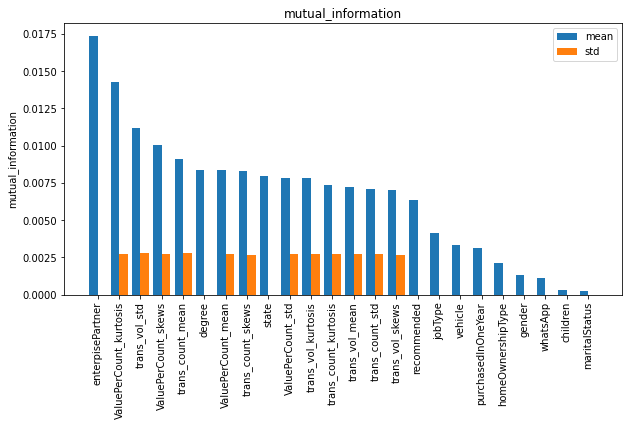

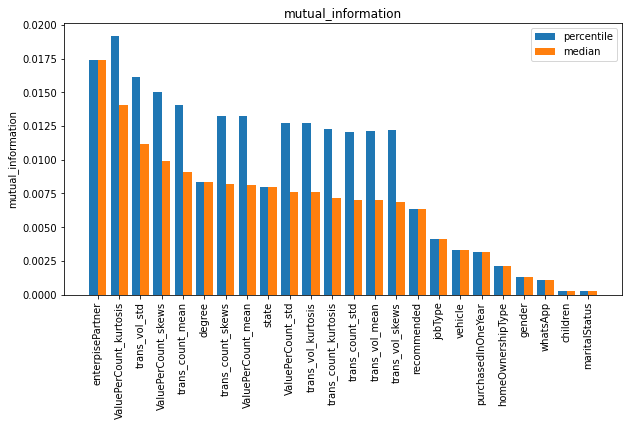



 
 Y_default
                   feature          std         mean       median   percentile
23  ValuePerCount_kurtosis   0.00226306    0.0101653   0.00988019    0.0143449
1                    state  1.73472e-18   0.00887204   0.00887204   0.00887204
6                   degree            0   0.00837236   0.00837236   0.00837236
17           trans_vol_std   0.00228397   0.00635416   0.00610132    0.0104562
0         enterpisePartner            0   0.00600057   0.00600057   0.00600057
22     ValuePerCount_skews   0.00224672   0.00534481   0.00509875    0.0095737
7                  jobType  8.67362e-19   0.00412069   0.00412069   0.00412069
12        trans_count_mean   0.00227812   0.00393029   0.00361599   0.00818825
20      ValuePerCount_mean    0.0022297   0.00354636   0.00324097    0.0077057
11             recommended  4.33681e-19   0.00347249   0.00347249   0.00347249
14       trans_count_skews   0.00216818   0.00330487   0.00304459   0.00759887
21       ValuePerCount_std   0.002155

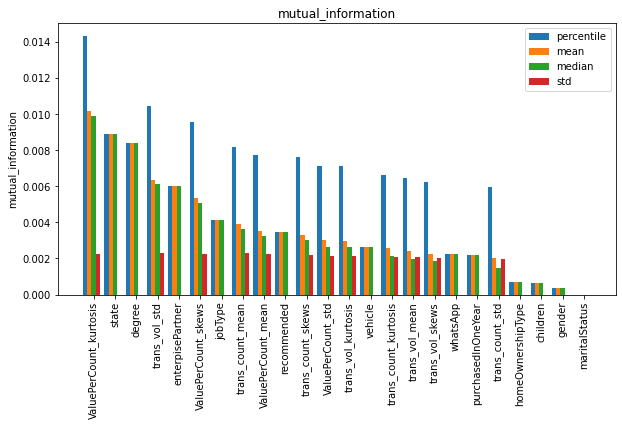

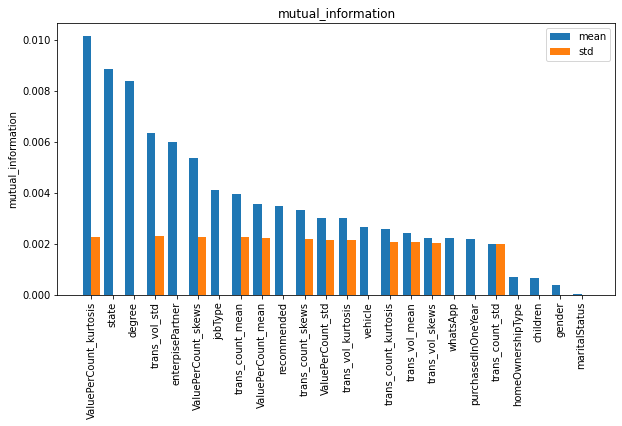

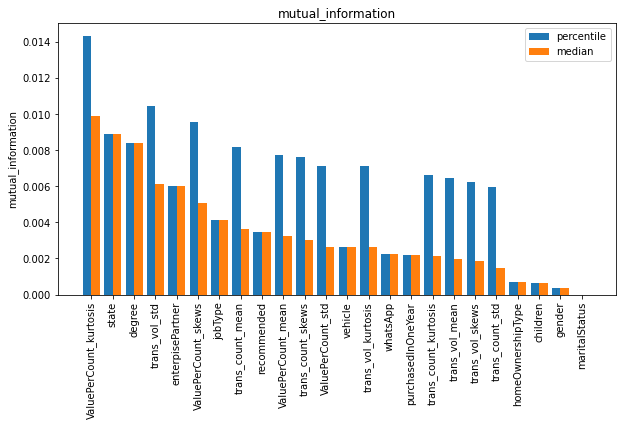



 
 Y_writeOff
                   feature          std         mean       median   percentile
9       purchasedInOneYear  1.73472e-18    0.0107229    0.0107229    0.0107229
6                  jobType  1.73472e-18    0.0106285    0.0106285    0.0106285
13       trans_count_skews    0.0026907   0.00976259   0.00934113    0.0149764
0         enterpisePartner  1.73472e-18   0.00935037   0.00935037   0.00935037
22  ValuePerCount_kurtosis   0.00271534   0.00905507   0.00877665    0.0140106
21     ValuePerCount_skews   0.00271507   0.00892383     0.008443    0.0139763
1                    state  1.73472e-18    0.0088586    0.0088586    0.0088586
16           trans_vol_std    0.0027068    0.0086881   0.00830023    0.0137096
11        trans_count_mean   0.00270629   0.00868271   0.00830736    0.0136962
20       ValuePerCount_std   0.00271425   0.00863034    0.0083654    0.0136217
15          trans_vol_mean   0.00271842   0.00852976   0.00826881    0.0134965
12         trans_count_std    0.0027

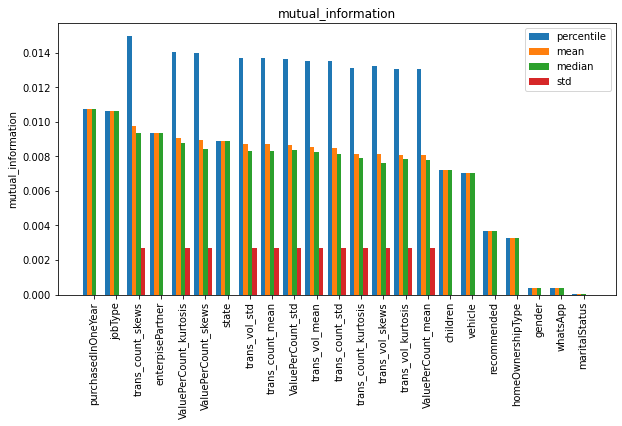

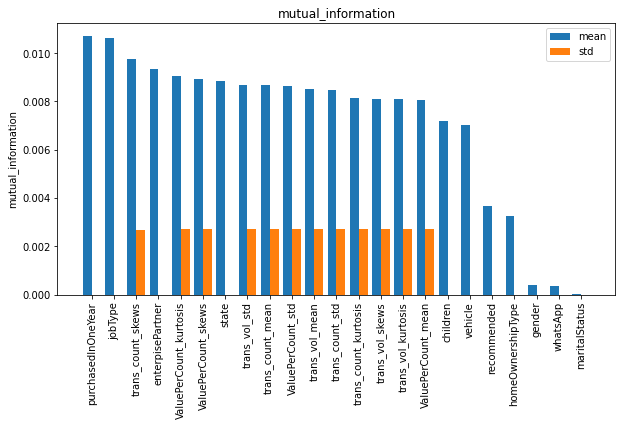

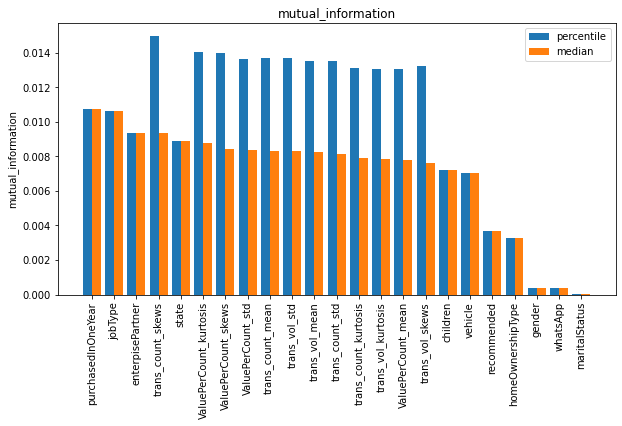

In [ ]:
print(" \n Y_delinquent")
mutual_information(df,Y_delinquent) # Y_delinquent,Y_default,Y_writeOff
print("\n")
print(" \n Y_default")
mutual_information(df,Y_default) # Y_delinquent,Y_default,Y_writeOff
print("\n")
print(" \n Y_writeOff")
mutual_information(df,Y_writeOff) # Y_delinquent,Y_default,Y_writeOff


 
 Y_delinquent
                   feature          std         mean       median   percentile
23  ValuePerCount_kurtosis   0.00243516    0.0194393    0.0192115    0.0234245
17           trans_vol_std   0.00243893    0.0135766    0.0130616    0.0171196
0         enterpisePartner  1.73472e-18    0.0120894    0.0120894    0.0120894
22     ValuePerCount_skews   0.00237915    0.0106463    0.0101983    0.0144328
12        trans_count_mean   0.00243585   0.00869786   0.00823506    0.0122539
6                   degree            0   0.00837236   0.00837236   0.00837236
1                    state            0   0.00817209   0.00817209   0.00817209
14       trans_count_skews   0.00231485   0.00761921    0.0073307    0.0112207
20      ValuePerCount_mean   0.00243516   0.00757813   0.00735028    0.0115634
19      trans_vol_kurtosis   0.00243516   0.00641684   0.00618899    0.0104021
21       ValuePerCount_std   0.00242869   0.00619844   0.00609521    0.0101816
13         trans_count_std    0.0024

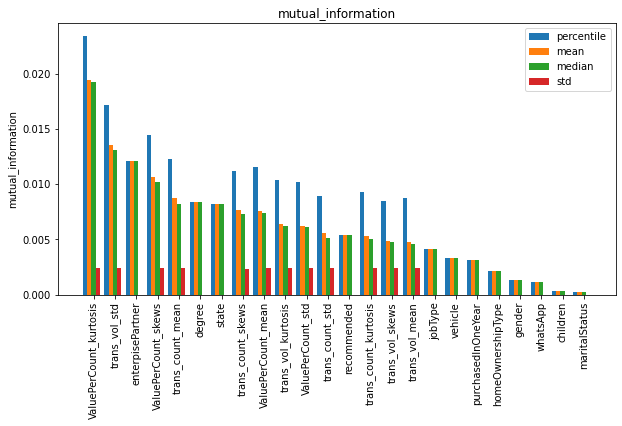

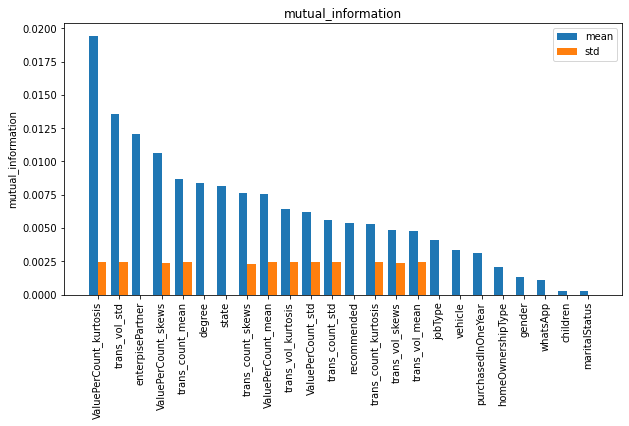

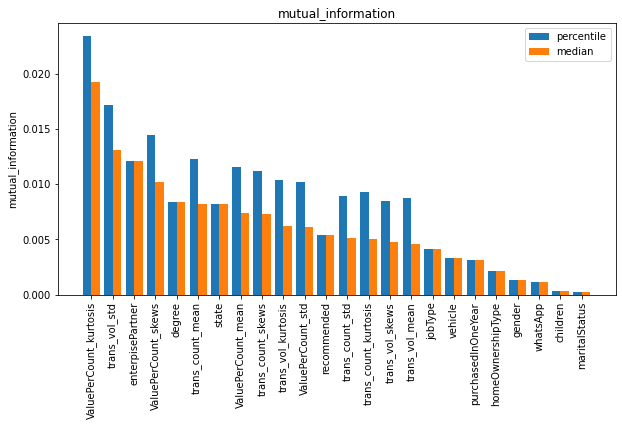



 
 Y_default
                   feature          std         mean       median   percentile
23  ValuePerCount_kurtosis  0.000652883    0.0135405    0.0134262    0.0145762
1                    state  3.46945e-18    0.0112834    0.0112834    0.0112834
6                   degree            0   0.00837236   0.00837236   0.00837236
17           trans_vol_std  0.000652883   0.00425256   0.00413832   0.00528832
7                  jobType  8.67362e-19   0.00412069   0.00412069   0.00412069
9                  vehicle            0   0.00264209   0.00264209   0.00264209
2                 whatsApp            0   0.00223379   0.00223379   0.00223379
10      purchasedInOneYear  4.33681e-19   0.00219329   0.00219329   0.00219329
11             recommended  4.33681e-19   0.00195881   0.00195881   0.00195881
22     ValuePerCount_skews  0.000630211   0.00100293  0.000956652   0.00185861
0         enterpisePartner            0  0.000837386  0.000837386  0.000837386
8        homeOwnershipType   2.1684e-

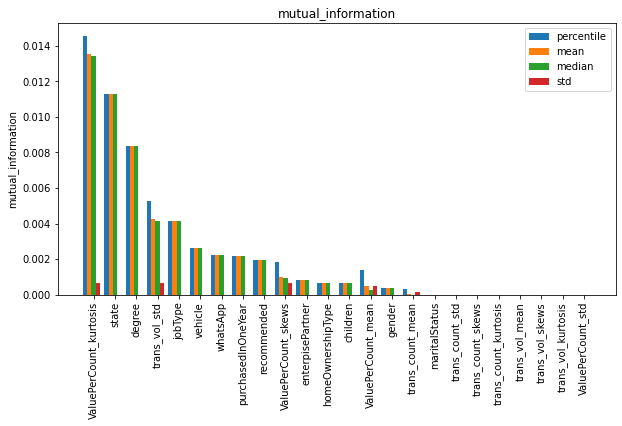

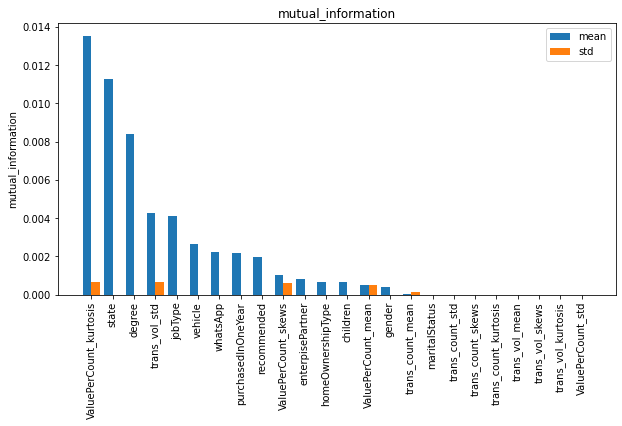

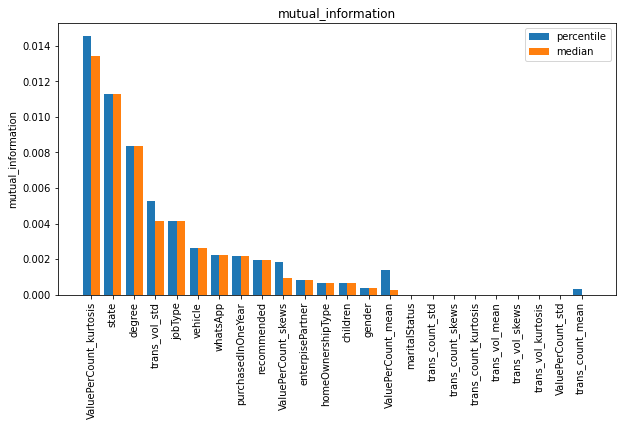



 
 Y_writeOff
                   feature          std         mean       median   percentile
1                    state            0    0.0156584    0.0156584    0.0156584
9       purchasedInOneYear  1.73472e-18    0.0107229    0.0107229    0.0107229
6                  jobType  1.73472e-18    0.0106285    0.0106285    0.0106285
5                 children  1.73472e-18   0.00719524   0.00719524   0.00719524
8                  vehicle  8.67362e-19   0.00701725   0.00701725   0.00701725
0         enterpisePartner  8.67362e-19   0.00431617   0.00431617   0.00431617
7        homeOwnershipType  4.33681e-19   0.00327302   0.00327302   0.00327302
13       trans_count_skews    0.0010856   0.00131566   0.00121831   0.00310873
22  ValuePerCount_kurtosis   0.00098897   0.00086552  0.000290327   0.00266101
3                   gender  5.42101e-20  0.000398606  0.000398606  0.000398606
2                 whatsApp  5.42101e-20  0.000354517  0.000354517  0.000354517
16           trans_vol_std  0.000292

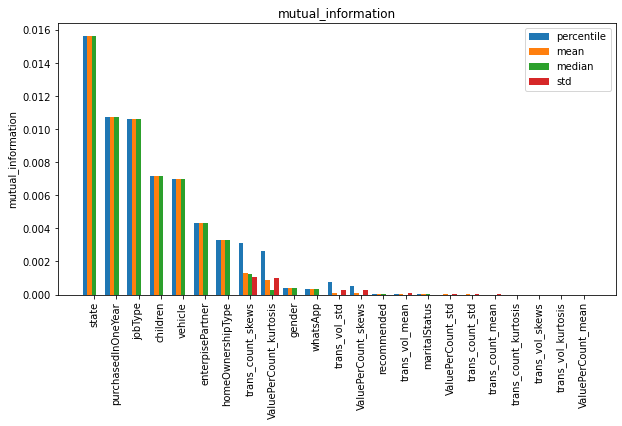

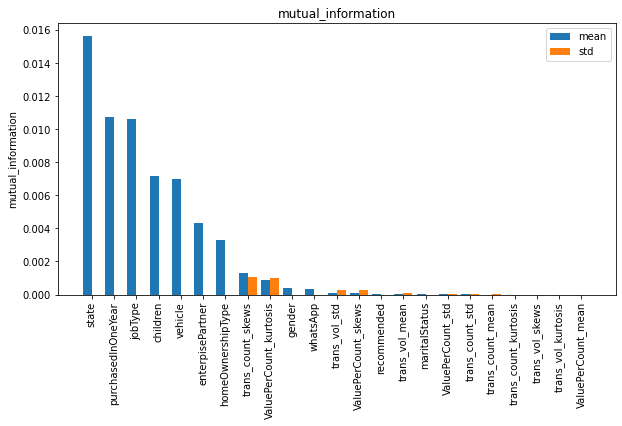

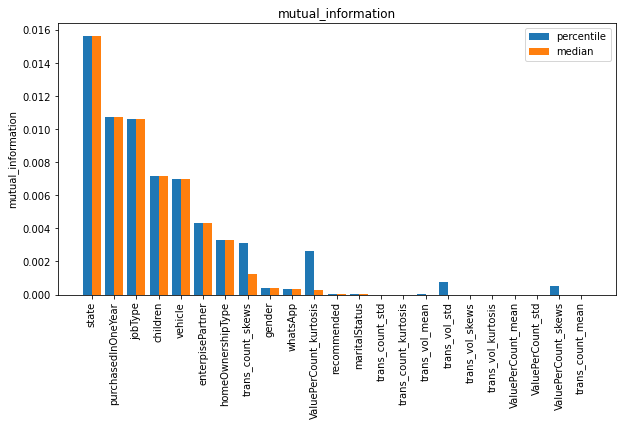

In [ ]:
print(" \n Y_delinquent")
mutual_information(df_subset,Y_delinquent) # Y_delinquent,Y_default,Y_writeOff
print("\n")
print(" \n Y_default")
mutual_information(df_subset,Y_default) # Y_delinquent,Y_default,Y_writeOff
print("\n")
print(" \n Y_writeOff")
mutual_information(df_subset,Y_writeOff) # Y_delinquent,Y_default,Y_writeOff
